# Biogas Production Analysis


In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
from termcolor import colored



In [68]:
df = pd.read_csv('veri_seti_son_2.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [69]:
df.head(3)

,Project Name,Project Type,City,County,State,Digester Type,Status,Year Operational,Animal/Farm Type(s),Cattle,Dairy,Poultry,Swine,Co-Digestion,Biogas Generation Estimate (cu-ft/day),Electricity Generated (kWh/yr),Biogas End Use(s),LCFS Pathway?,Receiving Utility,Total Emission Reductions (MTCO2e/yr),Awarded USDA Funding?,Operational Years,Total_Animals,Biogas_per_Animal (cu-ft/day),Emission_Reduction_per_Year,Electricity_to_Biogas_Ratio,Total_Waste_kg/day,Waste_Efficiency,Electricity_Efficiency
0,Cargill - Sandy River Farm Digester,Farm Scale,Morrilton,Conway,Arkansas,Covered Lagoon,Operational,2008.000,Swine,0.000,0.000,0.000,4200.000,No-Info,1814400.000,0.000,Flared Full-time,No-Info,No-Info,4482.755,No-Info,15.000,4200.000,432.000,298.850,0.000,21000.000,86.400,0.000
1,Butterfield RNG Digester,Farm Scale,Buckeye,Maricopa,Arizona,Mixed Plug Flow,Operational,2022.000,Dairy,0.000,11760.000,0.000,0.000,No-Info,109486.000,389698.200,Pipeline Gas,No-Info,Yes,14030.129,Yes,1.000,11760.000,9.310,14030.129,3.559,399840.000,0.274,0.975
2,Caballero Dairy Farms Digester,Farm Scale,Eloy,Pinal,Arizona,Unknown or Unspecified,Construction,2022.000,Dairy,0.000,8800.000,0.000,0.000,No-Info,94500.000,2813080.400,Pipeline Gas,No-Info,No-Info,98999.890,No-Info,1.000,8800.000,10.739,98999.890,29.768,299200.000,0.316,9.402


In [70]:
def print_section_title(title):
    print(colored(title, 'blue', attrs=['bold', 'underline']))

def print_heads_and_tails(dataframe, head = 5):
    display(dataframe.head(head).style.set_caption('Heads'))
    display(dataframe.tail(head).style.set_caption('Tails'))

def display_na(dataframe):
    na_df = df.isnull().sum().reset_index()
    na_df.columns = ['Column', 'Number of NA Values']
    display(na_df.style.set_caption('Number of Na Values'))


def display_quantiles(dataframe):
    quantiles_df = dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1])
    display(quantiles_df.style.format("{:.2f}").set_caption('Quantiles'))

def check_df(dataframe, head = 5):
    print_section_title('Shape')
    print(dataframe.shape)
    print_section_title('Types')
    print(dataframe.dtypes.to_frame('Data Type').style.set_caption("Data Types"))
    print_section_title('Info')
    print(dataframe.info())
    print_section_title('Head and Tail')
    print_heads_and_tails(dataframe, head)
    print_section_title('Na Values')
    display_na(dataframe)
    print_section_title('Quantiles')
    display_quantiles(dataframe)



In [71]:
check_df(df)

Shape
(491, 29)
Types
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Project Name                            491 non-null    object 
 1   Project Type                            491 non-null    object 
 2   City                                    491 non-null    object 
 3   County                                  491 non-null    object 
 4   State                                   491 non-null    object 
 5   Digester Type                           491 non-null    object 
 6   Status                                  491 non-null    object 
 7   Year Operational                        491 non-null    float64
 8   Animal/Farm Type(s)                     491 non-null    object 
 9   Cattle                                  491 non-null    float64
 10  Dairy                              

,Project Name,Project Type,City,County,State,Digester Type,Status,Year Operational,Animal/Farm Type(s),Cattle,Dairy,Poultry,Swine,Co-Digestion,Biogas Generation Estimate (cu-ft/day),Electricity Generated (kWh/yr),Biogas End Use(s),LCFS Pathway?,Receiving Utility,Total Emission Reductions (MTCO2e/yr),Awarded USDA Funding?,Operational Years,Total_Animals,Biogas_per_Animal (cu-ft/day),Emission_Reduction_per_Year,Electricity_to_Biogas_Ratio,Total_Waste_kg/day,Waste_Efficiency,Electricity_Efficiency
0,Cargill - Sandy River Farm Digester,Farm Scale,Morrilton,Conway,Arkansas,Covered Lagoon,Operational,2008.000000,Swine,0.000000,0.000000,0.000000,4200.000000,No-Info,1814400.000000,0.000000,Flared Full-time,No-Info,No-Info,4482.755303,No-Info,15.000000,4200.000000,432.000000,298.850354,0.000000,21000.000000,86.400000,0.000000
1,Butterfield RNG Digester,Farm Scale,Buckeye,Maricopa,Arizona,Mixed Plug Flow,Operational,2022.000000,Dairy,0.000000,11760.000000,0.000000,0.000000,No-Info,109486.000000,389698.200000,Pipeline Gas,No-Info,Yes,14030.128975,Yes,1.000000,11760.000000,9.310034,14030.128975,3.559343,399840.000000,0.273825,0.974635
2,Caballero Dairy Farms Digester,Farm Scale,Eloy,Pinal,Arizona,Unknown or Unspecified,Construction,2022.000000,Dairy,0.000000,8800.000000,0.000000,0.000000,No-Info,94500.000000,2813080.400000,Pipeline Gas,No-Info,No-Info,98999.890159,No-Info,1.000000,8800.000000,10.738636,98999.890159,29.768047,299200.000000,0.315842,9.402007
3,Green Gas Partners Stanfield Digester,Centralized/Regional,Maricopa,Pinal,Arizona,Complete Mix,Operational,2018.000000,Dairy,0.000000,30000.000000,0.000000,0.000000,No-Info,3454500.000000,2760336.000000,Pipeline Gas,No-Info,Yes,337499.625540,No-Info,5.000000,30000.000000,115.150000,67499.925108,0.799055,1020000.000000,3.386765,2.706212
4,Paloma Dairy Digester,Farm Scale,Gila Bend,Maricopa,Arizona,Complete Mix,Operational,2021.000000,Dairy,0.000000,10000.000000,0.000000,0.000000,No-Info,852545.200000,0.000000,CNG,No-Info,Yes,100569.493399,No-Info,2.000000,10000.000000,85.254520,50284.746699,0.000000,340000.000000,2.507486,0.000000


,Project Name,Project Type,City,County,State,Digester Type,Status,Year Operational,Animal/Farm Type(s),Cattle,Dairy,Poultry,Swine,Co-Digestion,Biogas Generation Estimate (cu-ft/day),Electricity Generated (kWh/yr),Biogas End Use(s),LCFS Pathway?,Receiving Utility,Total Emission Reductions (MTCO2e/yr),Awarded USDA Funding?,Operational Years,Total_Animals,Biogas_per_Animal (cu-ft/day),Emission_Reduction_per_Year,Electricity_to_Biogas_Ratio,Total_Waste_kg/day,Waste_Efficiency,Electricity_Efficiency
486,Quantum Dairy Digester,Farm Scale,Weyauwega,Waupaca,Wisconsin,Mixed Plug Flow,Shut down,2005.000000,Dairy,0.000000,1200.000000,0.000000,0.000000,No-Info,356020.000000,3350700.000000,Cogeneration,No-Info,Yes,45346.436601,Yes,18.000000,1200.000000,296.683333,2519.246478,9.411550,40800.000000,8.725980,82.125000
487,Stencil Farm Digester,Farm Scale,Denmark,Brown,Wisconsin,Horizontal Plug Flow,Shut down,2002.000000,Dairy,0.000000,1000.000000,0.000000,0.000000,No-Info,310865.600000,946080.000000,Electricity,No-Info,Yes,50391.122119,No-Info,21.000000,1000.000000,310.865600,2399.577244,3.043373,34000.000000,9.143106,27.825882
488,Tinedale Farms Digester,Farm Scale,Wrightstown,Jackson,Wisconsin,Fixed Film/Attached Media,Shut down,1999.000000,Dairy,0.000000,1800.000000,0.000000,0.000000,No-Info,200000.000000,5584500.000000,Electricity; Boiler/Furnace fuel,No-Info,No-Info,46163.455081,No-Info,24.000000,1800.000000,111.111111,1923.477295,27.922500,61200.000000,3.267974,91.250000
489,USEMCO - Peters Farm Digester,Farm Scale,Chaseburg,Vernon,Wisconsin,Complete Mix,Shut down,2011.000000,Dairy,0.000000,200.000000,0.000000,0.000000,Yes,23000.000000,3206160.000000,Electricity,No-Info,Yes,91464.824612,No-Info,12.000000,200.000000,115.000000,7622.068718,139.398261,6800.000000,3.382353,471.494118
490,Wyoming Premium Farms 2 Digester,Farm Scale,Wheatland,Platte,Wyoming,Complete Mix,Shut down,2004.000000,Swine,0.000000,0.000000,0.000000,18000.000000,No-Info,445540.000000,1340280.000000,Electricity,No-Info,No-Info,30798.542361,No-Info,19.000000,18000.000000,24.752222,1620.975914,3.008215,90000.000000,4.950444,14.892000


Na Values


,Column,Number of NA Values
0,Project Name,0
1,Project Type,0
2,City,0
3,County,0
4,State,0
5,Digester Type,0
6,Status,0
7,Year Operational,0
8,Animal/Farm Type(s),0
9,Cattle,0


Quantiles


,Year Operational,Cattle,Dairy,Poultry,Swine,Biogas Generation Estimate (cu-ft/day),Electricity Generated (kWh/yr),Total Emission Reductions (MTCO2e/yr),Operational Years,Total_Animals,Biogas_per_Animal (cu-ft/day),Emission_Reduction_per_Year,Electricity_to_Biogas_Ratio,Total_Waste_kg/day,Waste_Efficiency,Electricity_Efficiency
count,491.00,491.00,491.00,491.00,491.00,491.00,491.00,491.00,491.00,491.00,491.00,491.00,491.00,491.00,491.00,491.00
mean,2012.57,183.52,3543.31,6087.58,2969.49,443918.46,2218724.16,38377.98,10.49,12783.90,527.76,9914.18,10.06,139538.21,51.69,40.77
std,8.77,2237.16,4984.93,61662.90,17713.66,414336.11,4487113.72,45532.72,8.69,63625.76,4241.48,18366.55,19.01,195557.63,819.43,93.33
min,1972.00,0.00,0.00,0.00,0.00,5000.00,0.00,4.22,0.00,10.00,0.39,0.00,0.00,50.00,0.04,0.00
0%,1972.00,0.00,0.00,0.00,0.00,5000.00,0.00,4.22,0.00,10.00,0.39,0.00,0.00,50.00,0.04,0.00
5%,1998.00,0.00,0.00,0.00,0.00,33692.50,0.00,2018.51,0.00,350.00,4.05,0.00,0.00,8500.00,0.53,0.00
50%,2012.00,0.00,2000.00,0.00,0.00,344690.00,756437.80,24094.43,11.00,3157.00,75.63,1695.22,4.00,76500.00,2.69,18.02
95%,2023.00,0.00,10375.00,0.00,9696.00,1017422.60,8216981.40,103921.22,25.00,34000.00,1445.03,57594.20,40.08,403920.00,57.57,141.57
99%,2025.00,2700.00,30250.00,132000.00,80050.00,1817830.00,16276400.00,255068.93,41.00,166000.00,5324.62,84177.47,97.79,1106700.00,199.09,382.19
100%,2025.00,40000.00,39000.00,1200000.00,239200.00,3454500.00,70364700.00,390000.01,51.00,1200000.00,90654.52,130000.00,174.27,2126000.00,18130.90,1150.82


In [72]:
# let's drop columns that we do not need. We focus only on Dairy cattle
columns_to_drop = ["Project Name", "City", "County", "State", 'Cattle', 'Poultry', 'Swine', 'Total_Animals']

df.drop(columns_to_drop, axis =1, inplace=True)


In [73]:
# drop rows where dairy is 0
df = df[df['Dairy'] != 0]

In [74]:
df.shape

(420, 21)

In [75]:
df.head()

,Project Type,Digester Type,Status,Year Operational,Animal/Farm Type(s),Dairy,Co-Digestion,Biogas Generation Estimate (cu-ft/day),Electricity Generated (kWh/yr),Biogas End Use(s),LCFS Pathway?,Receiving Utility,Total Emission Reductions (MTCO2e/yr),Awarded USDA Funding?,Operational Years,Biogas_per_Animal (cu-ft/day),Emission_Reduction_per_Year,Electricity_to_Biogas_Ratio,Total_Waste_kg/day,Waste_Efficiency,Electricity_Efficiency
1,Farm Scale,Mixed Plug Flow,Operational,2022.000,Dairy,11760.000,No-Info,109486.000,389698.200,Pipeline Gas,No-Info,Yes,14030.129,Yes,1.000,9.310,14030.129,3.559,399840.000,0.274,0.975
2,Farm Scale,Unknown or Unspecified,Construction,2022.000,Dairy,8800.000,No-Info,94500.000,2813080.400,Pipeline Gas,No-Info,No-Info,98999.890,No-Info,1.000,10.739,98999.890,29.768,299200.000,0.316,9.402
3,Centralized/Regional,Complete Mix,Operational,2018.000,Dairy,30000.000,No-Info,3454500.000,2760336.000,Pipeline Gas,No-Info,Yes,337499.626,No-Info,5.000,115.150,67499.925,0.799,1020000.000,3.387,2.706
4,Farm Scale,Complete Mix,Operational,2021.000,Dairy,10000.000,No-Info,852545.200,0.000,CNG,No-Info,Yes,100569.493,No-Info,2.000,85.255,50284.747,0.000,340000.000,2.507,0.000
5,Farm Scale,Covered Lagoon,Operational,2011.000,Dairy,15000.000,No-Info,663685.200,5256000.000,Electricity,Yes,Yes,154991.550,No-Info,12.000,44.246,12915.962,7.919,510000.000,1.301,10.306


In [76]:

def grab_col_names(dataframe, cat_th = 10, car_th =20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"] # categorical columns
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"] # numerical categorical
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"] # continuous but in categ
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')


    return cat_cols, num_cols, cat_but_car, num_but_cat


In [77]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

Observations: 420
Variables: 21
cat_cols: 9
num_cols: 12
cat_but_car: 0
num_but_cat: 0


In [78]:
# lets outline categorical columns
cat_cols

['Project Type',
 'Digester Type',
 'Status',
 'Animal/Farm Type(s)',
 'Co-Digestion',
 'Biogas End Use(s)',
 'LCFS Pathway?',
 'Receiving Utility',
 'Awarded USDA Funding?']

In [79]:
num_cols

['Year Operational',
 'Dairy',
 'Biogas Generation Estimate (cu-ft/day)',
 'Electricity Generated (kWh/yr)',
 'Total Emission Reductions (MTCO2e/yr)',
 'Operational Years',
 'Biogas_per_Animal (cu-ft/day)',
 'Emission_Reduction_per_Year',
 'Electricity_to_Biogas_Ratio',
 'Total_Waste_kg/day',
 'Waste_Efficiency',
 'Electricity_Efficiency']

In [80]:
import matplotlib.pyplot as plt

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(), 'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    print('#################################################')
    if plot:
        plt.figure(figsize = (20, 8))
        sns.countplot(x = dataframe[col_name], data = dataframe)
        plt.xticks(rotation = 90)
        plt.show(block = True)




                        Project Type  Ratio
Project Type                               
Farm Scale                       385 91.667
Multiple Farm/Facility            15  3.571
Centralized/Regional              14  3.333
Research                           6  1.429
#################################################


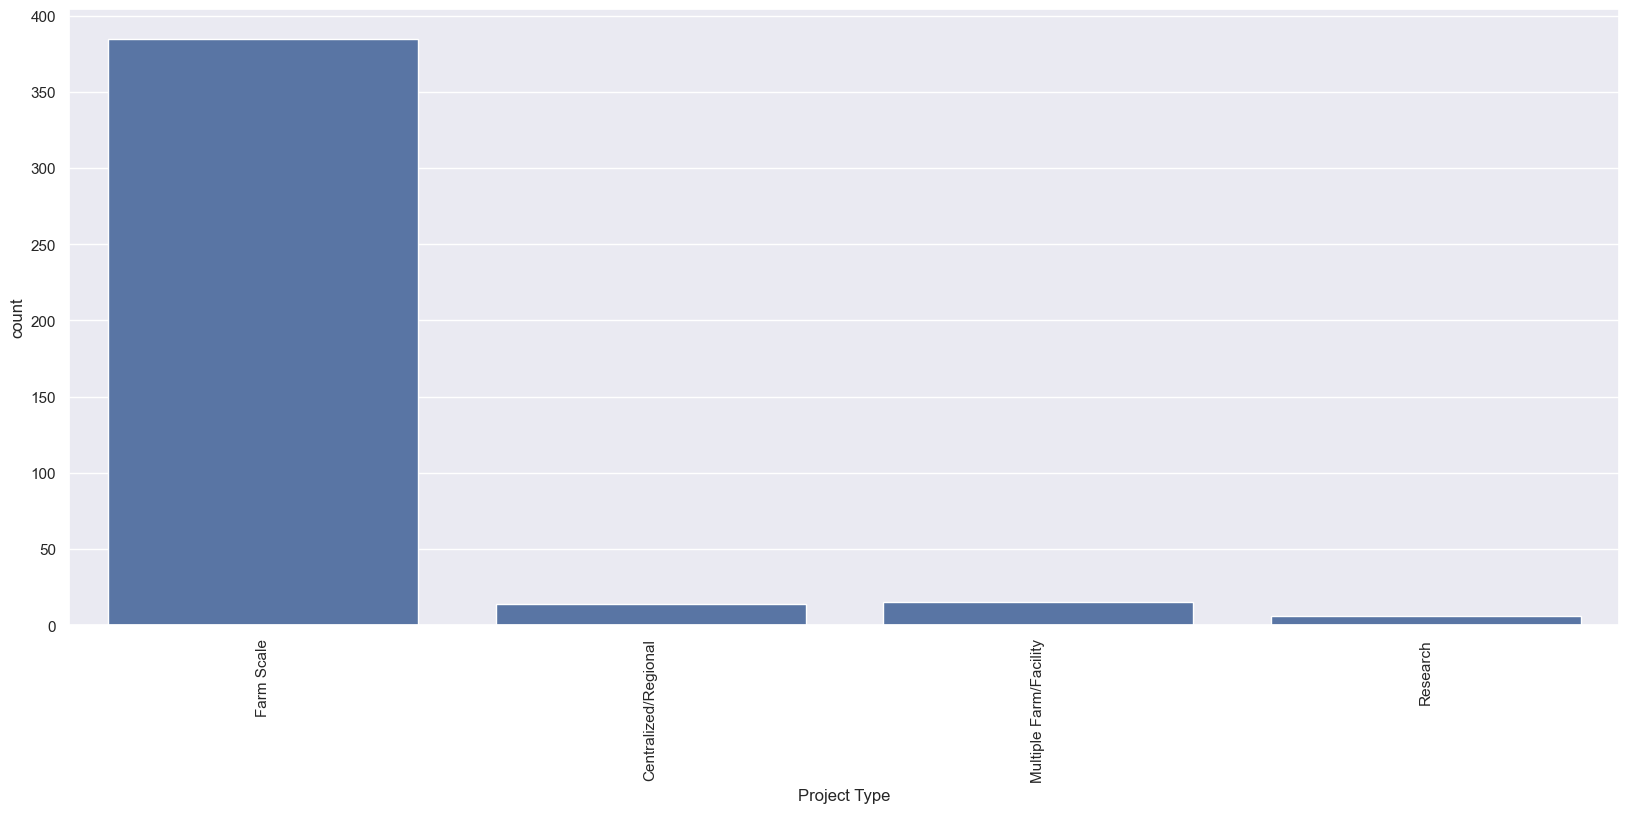

                                    Digester Type  Ratio
Digester Type                                           
Covered Lagoon                                146 34.762
Mixed Plug Flow                               109 25.952
Complete Mix                                  102 24.286
Horizontal Plug Flow                           32  7.619
Unknown or Unspecified                          8  1.905
Fixed Film/Attached Media                       6  1.429
Induced Blanket Reactor                         5  1.190
Anaerobic Sequencing Batch Reactor              3  0.714
Plug Flow - Unspecified                         3  0.714
Modular Plug Flow                               2  0.476
Vertical Plug Flow                              2  0.476
No-Info                                         1  0.238
Complete Mix Mini Digester                      1  0.238
#################################################


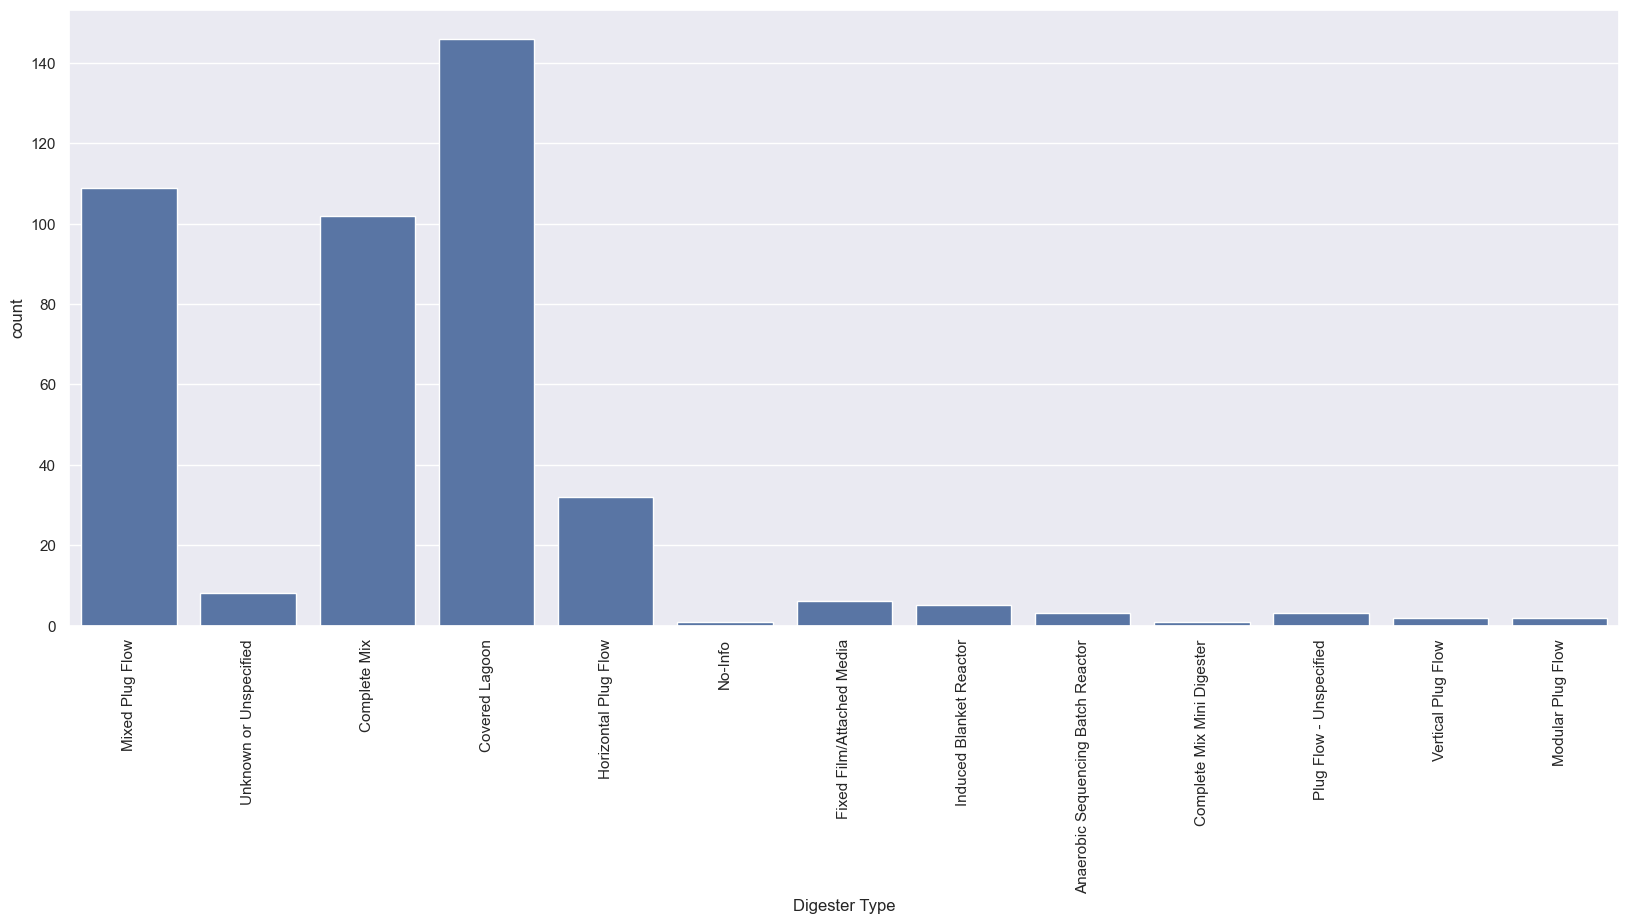

              Status  Ratio
Status                     
Operational      276 65.714
Construction      78 18.571
Shut down         66 15.714
#################################################


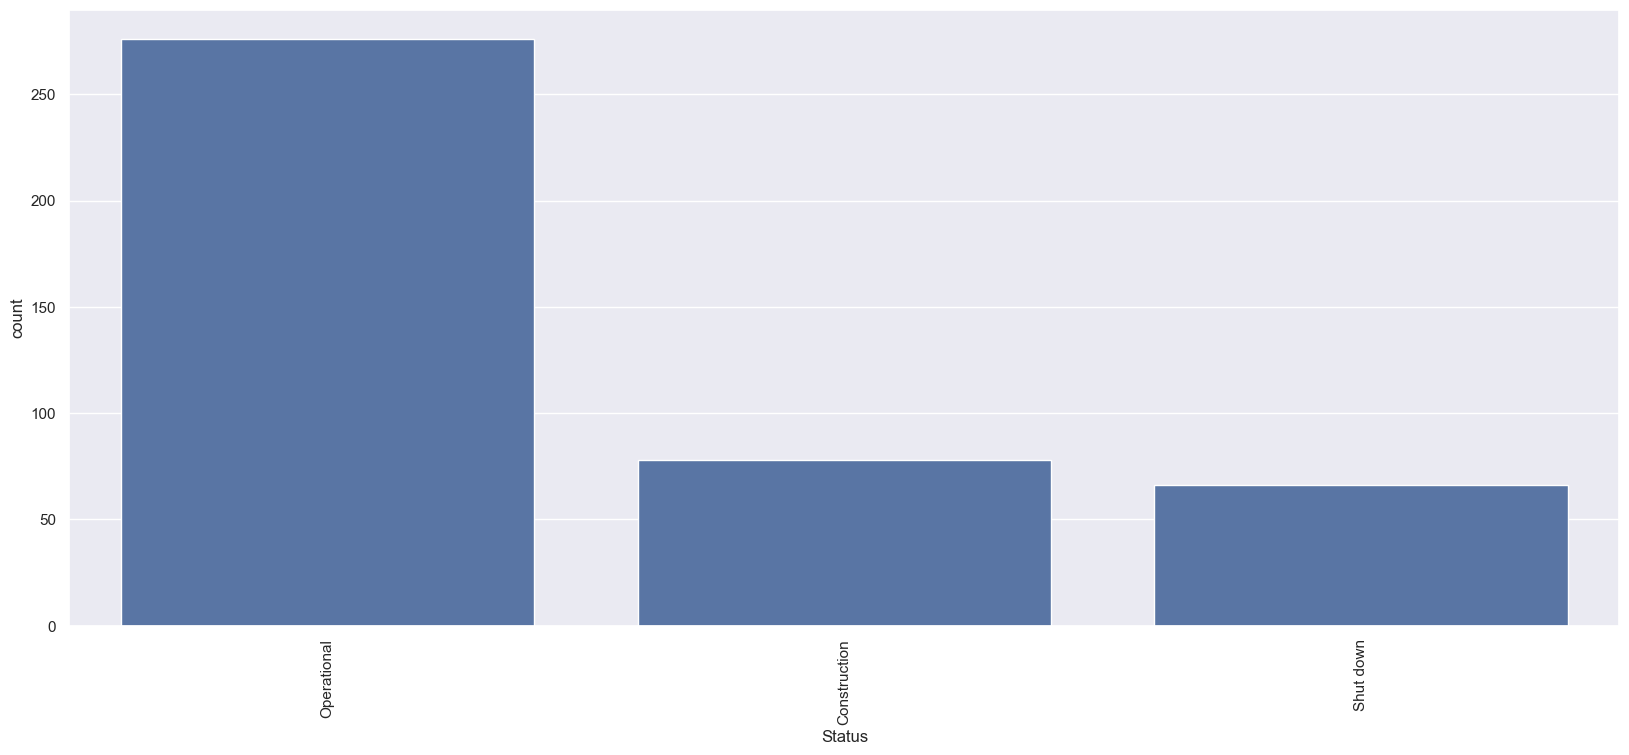

                       Animal/Farm Type(s)  Ratio
Animal/Farm Type(s)                              
Dairy                                  414 98.571
Dairy; Swine                             3  0.714
Cattle; Dairy                            2  0.476
Dairy; Poultry; Swine                    1  0.238
#################################################


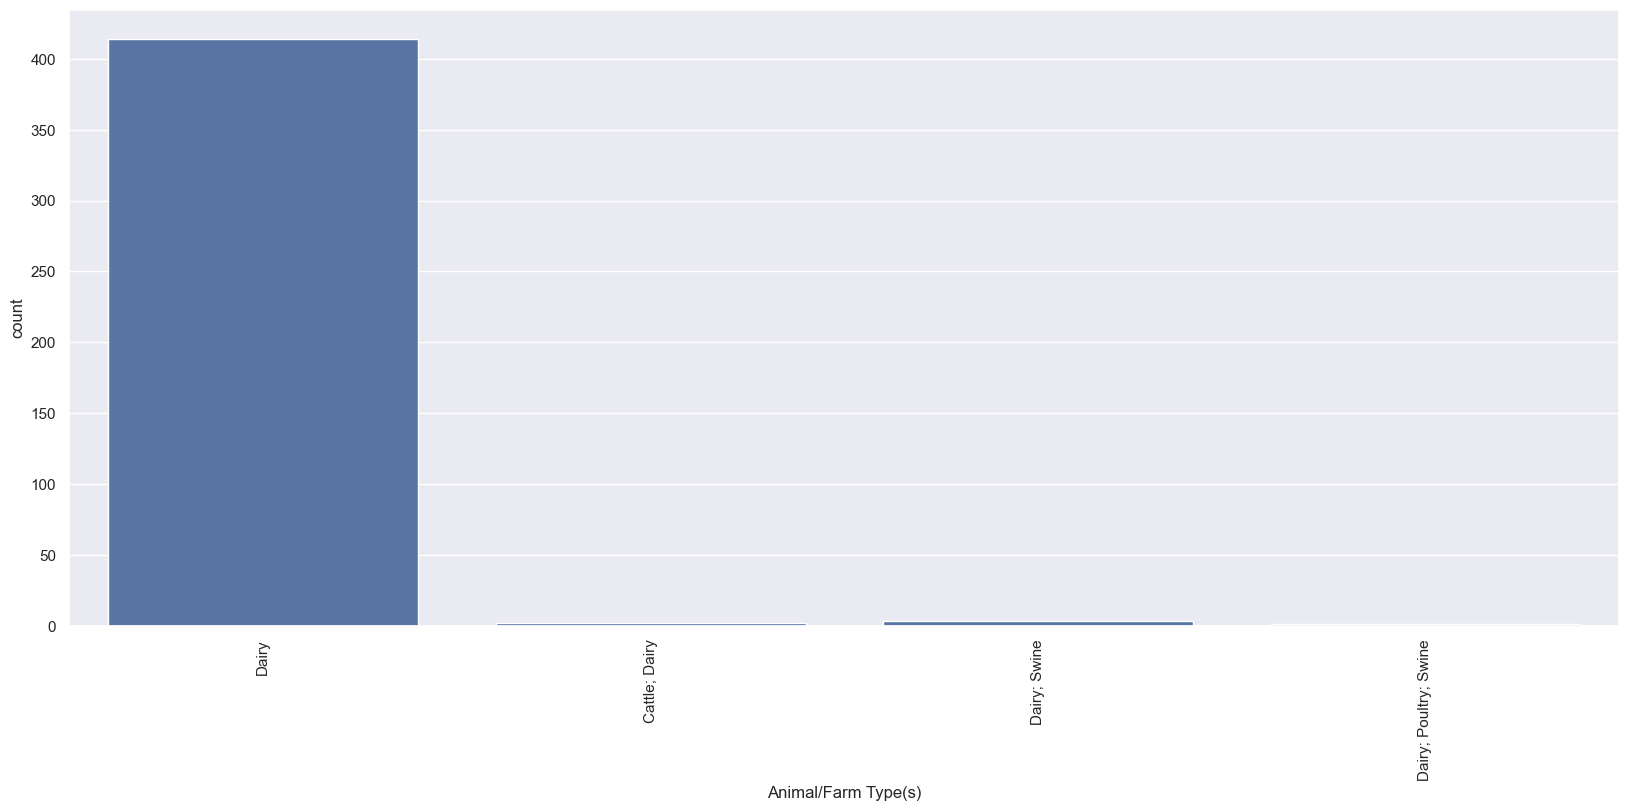

              Co-Digestion  Ratio
Co-Digestion                     
No-Info                311 74.048
Yes                    109 25.952
#################################################


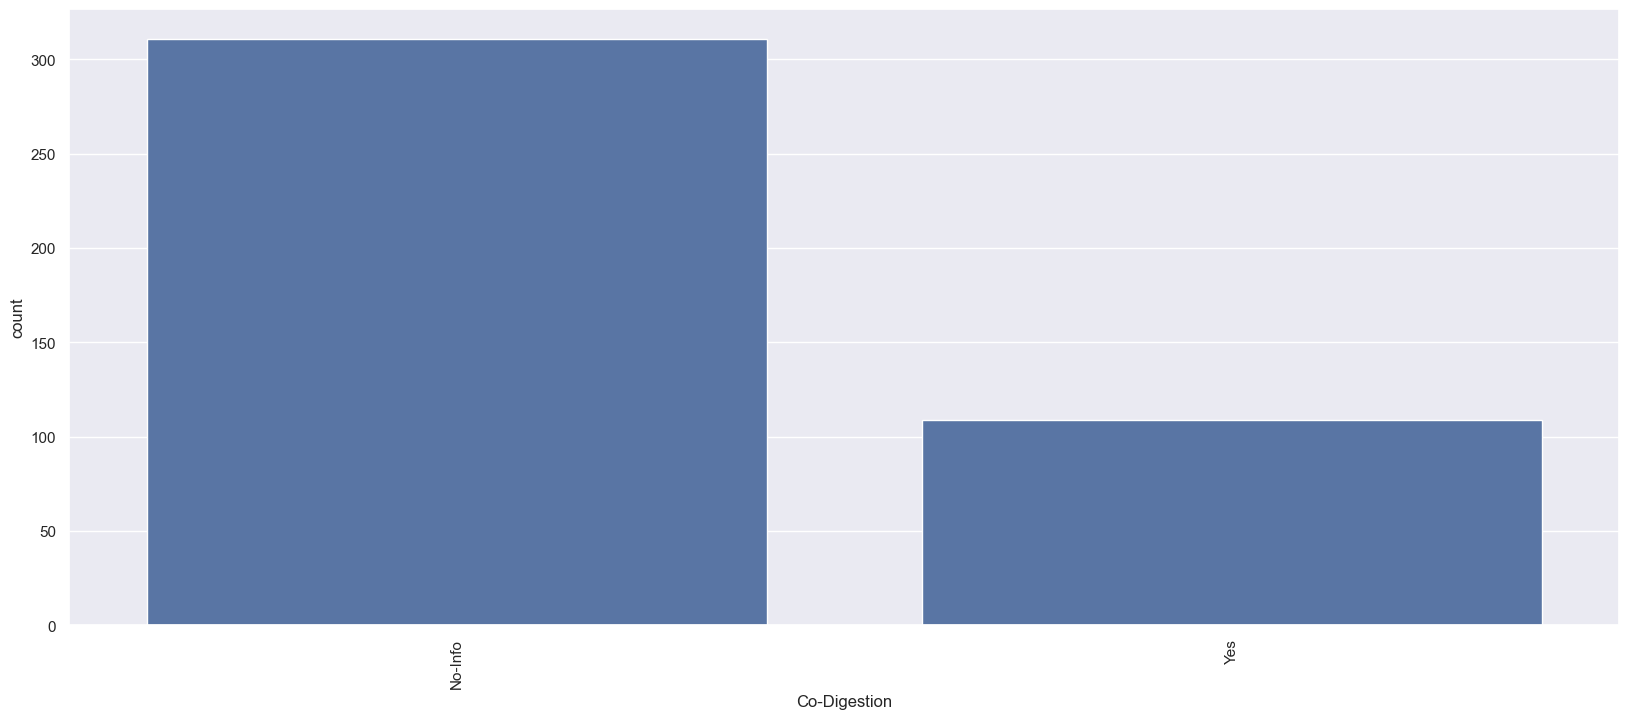

                                                Biogas End Use(s)  Ratio
Biogas End Use(s)                                                       
CNG                                                           113 26.905
Cogeneration                                                  102 24.286
Electricity                                                    84 20.000
Pipeline Gas                                                   58 13.810
Flared Full-time                                               11  2.619
Boiler/Furnace fuel                                            10  2.381
Electricity; Cogeneration                                       7  1.667
Electricity; Boiler/Furnace fuel                                7  1.667
No-Info                                                         5  1.190
Cogeneration; Boiler/Furnace fuel                               5  1.190
Electricity; Pipeline Gas                                       4  0.952
Electricity; CNG                                   

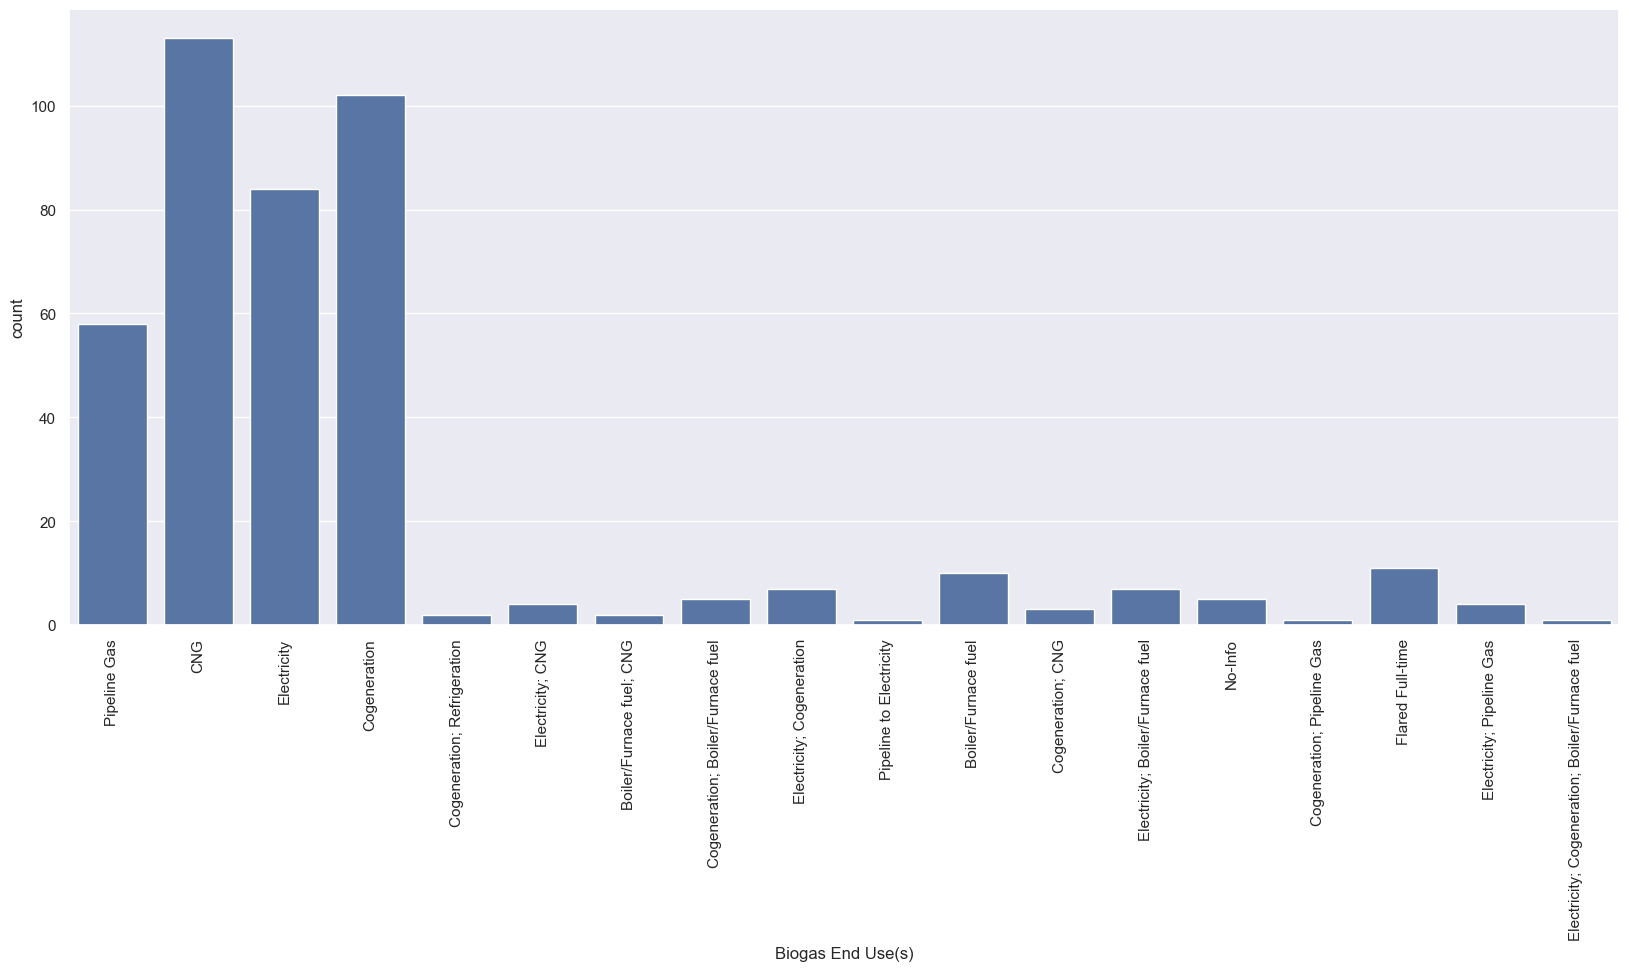

               LCFS Pathway?  Ratio
LCFS Pathway?                      
No-Info                  344 81.905
Yes                       76 18.095
#################################################


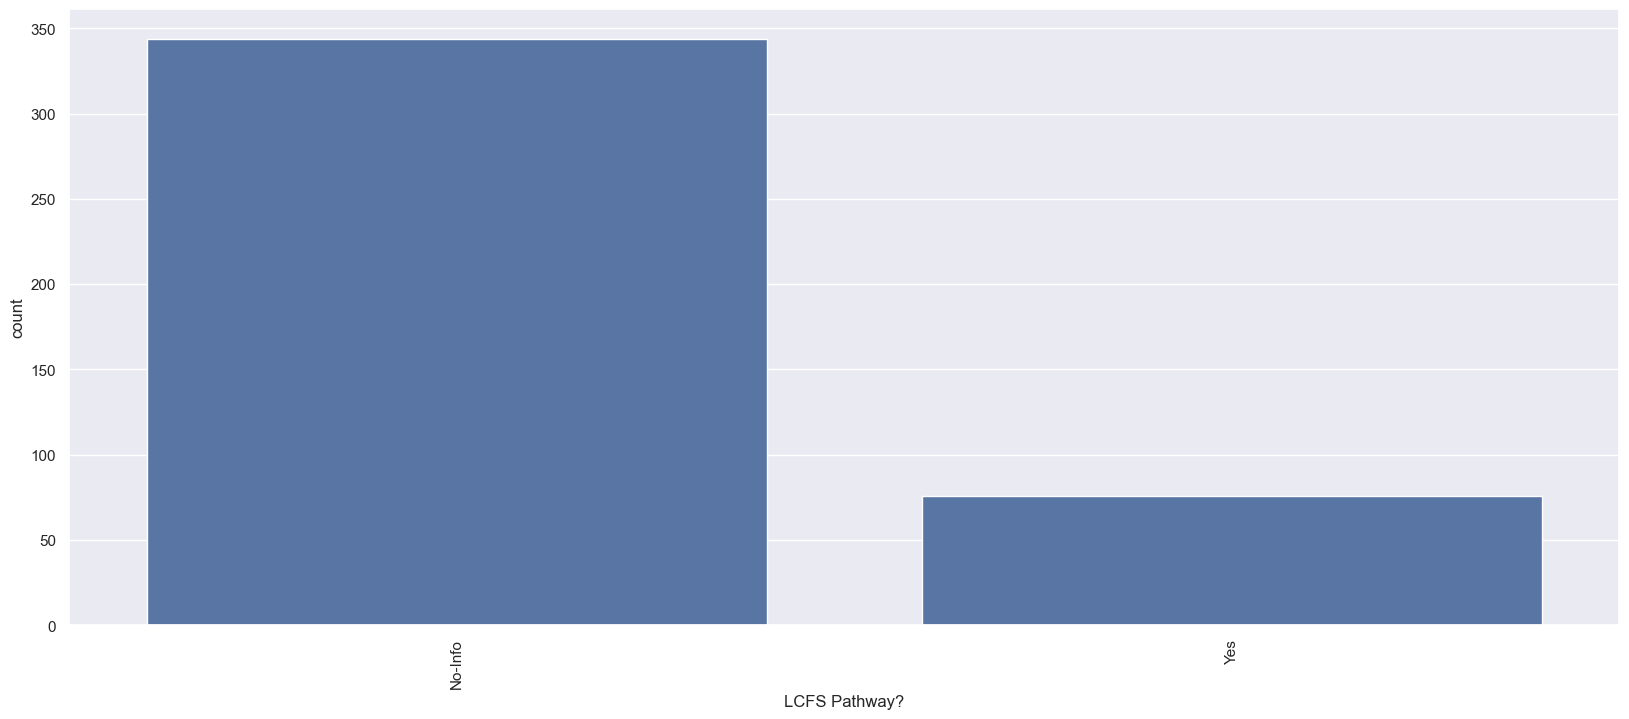

                   Receiving Utility  Ratio
Receiving Utility                          
Yes                              211 50.238
No-Info                          209 49.762
#################################################


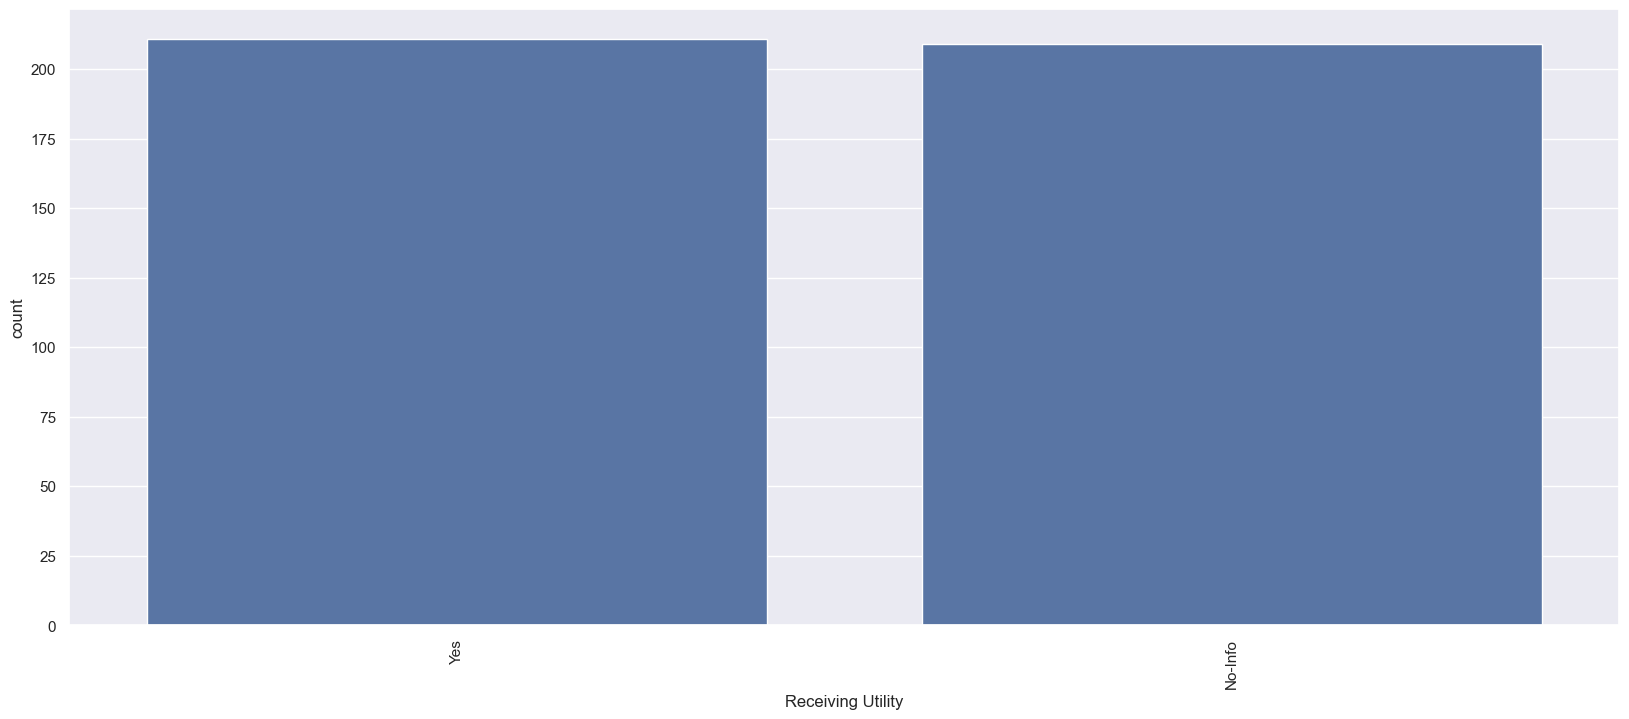

                       Awarded USDA Funding?  Ratio
Awarded USDA Funding?                              
No-Info                                  314 74.762
Yes                                      106 25.238
#################################################


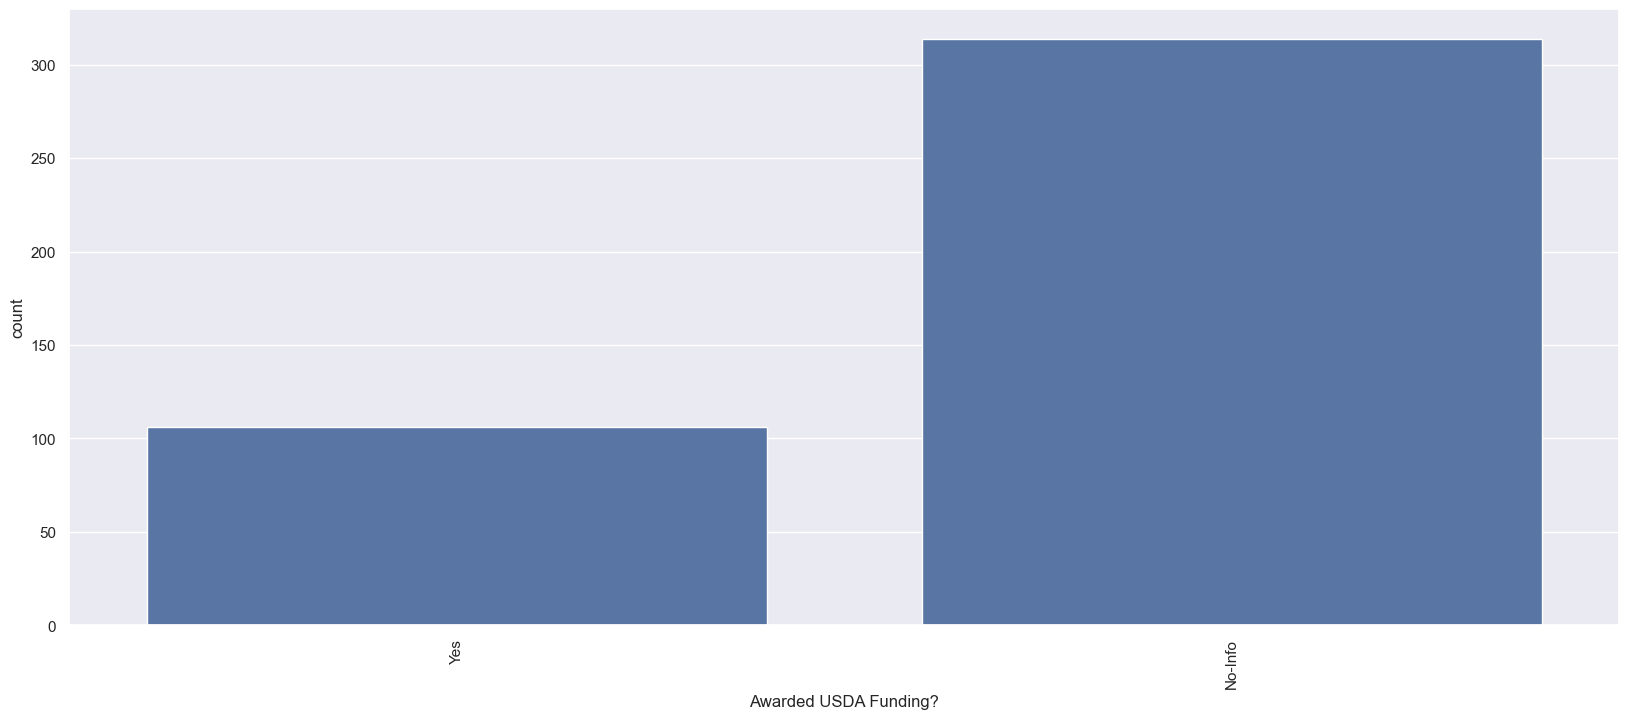

In [81]:
for col in cat_cols:
    cat_summary(df, col, plot = True)

In [82]:
# analysing numerical variables

def num_summary(dataframe, numerical_col, plot = False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)

        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block = True)

count    420.000
mean    2013.490
std        8.190
min     1979.000
5%      2001.000
10%     2004.000
20%     2007.000
30%     2009.000
40%     2011.000
50%     2013.000
60%     2018.000
70%     2021.000
80%     2022.000
90%     2023.000
95%     2023.000
99%     2025.000
max     2025.000
Name: Year Operational, dtype: float64


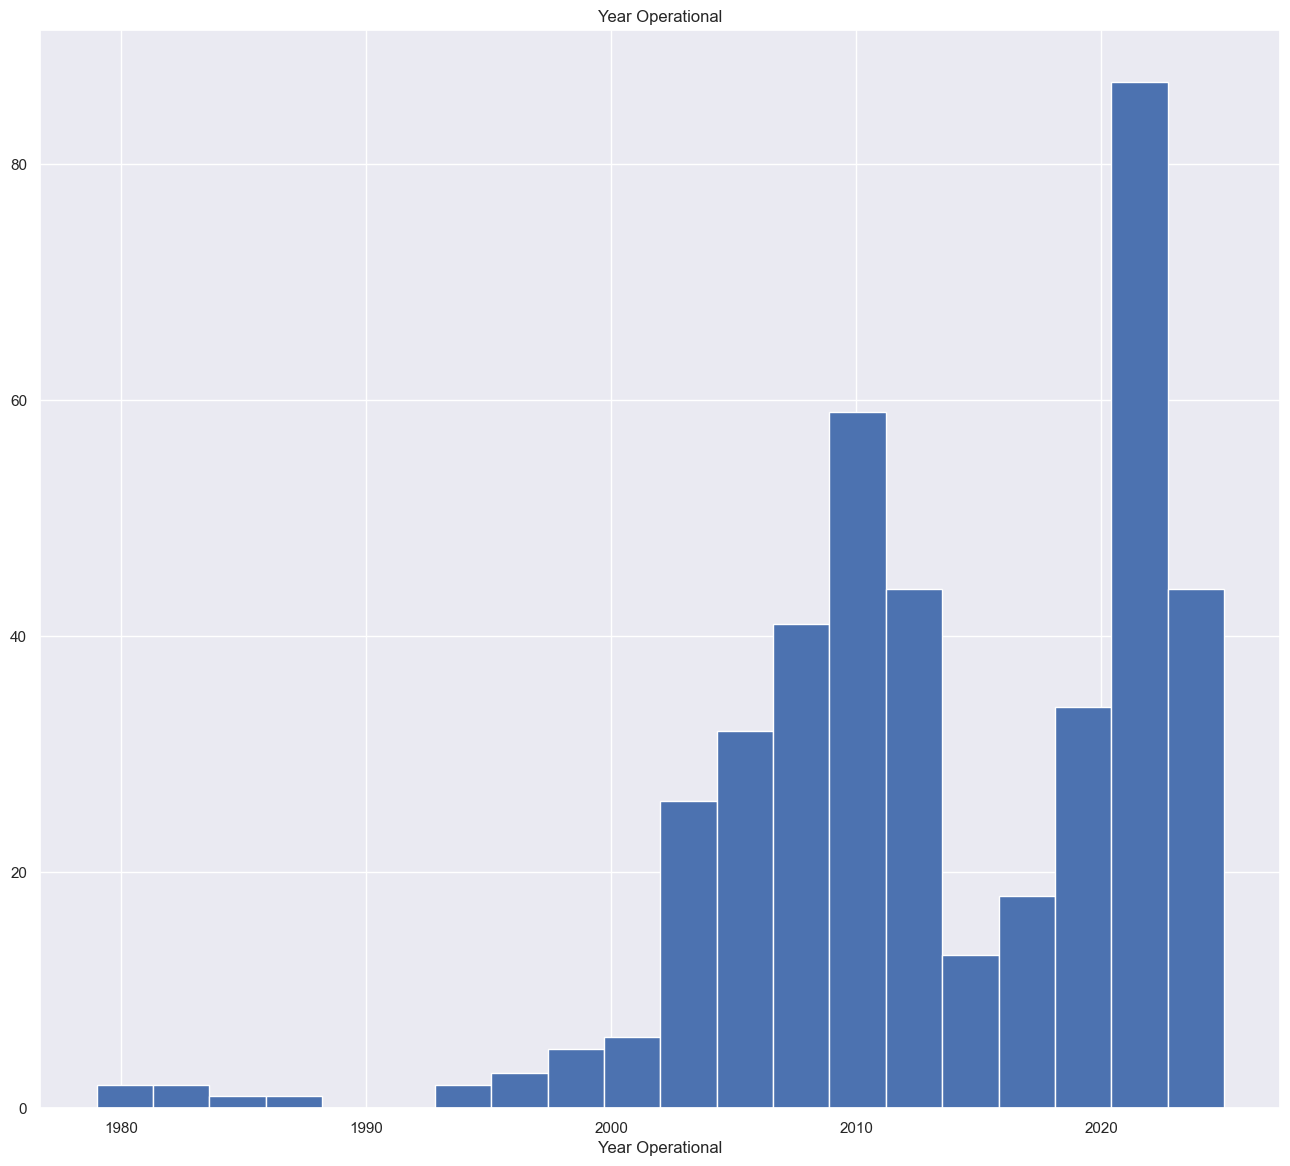

count     420.000
mean     4142.293
std      5154.917
min        30.000
5%        339.000
10%       473.000
20%       822.000
30%      1200.000
40%      1980.000
50%      2500.000
60%      3604.400
70%      5000.000
80%      6500.000
90%      8910.000
95%     10725.450
99%     32025.000
max     39000.000
Name: Dairy, dtype: float64


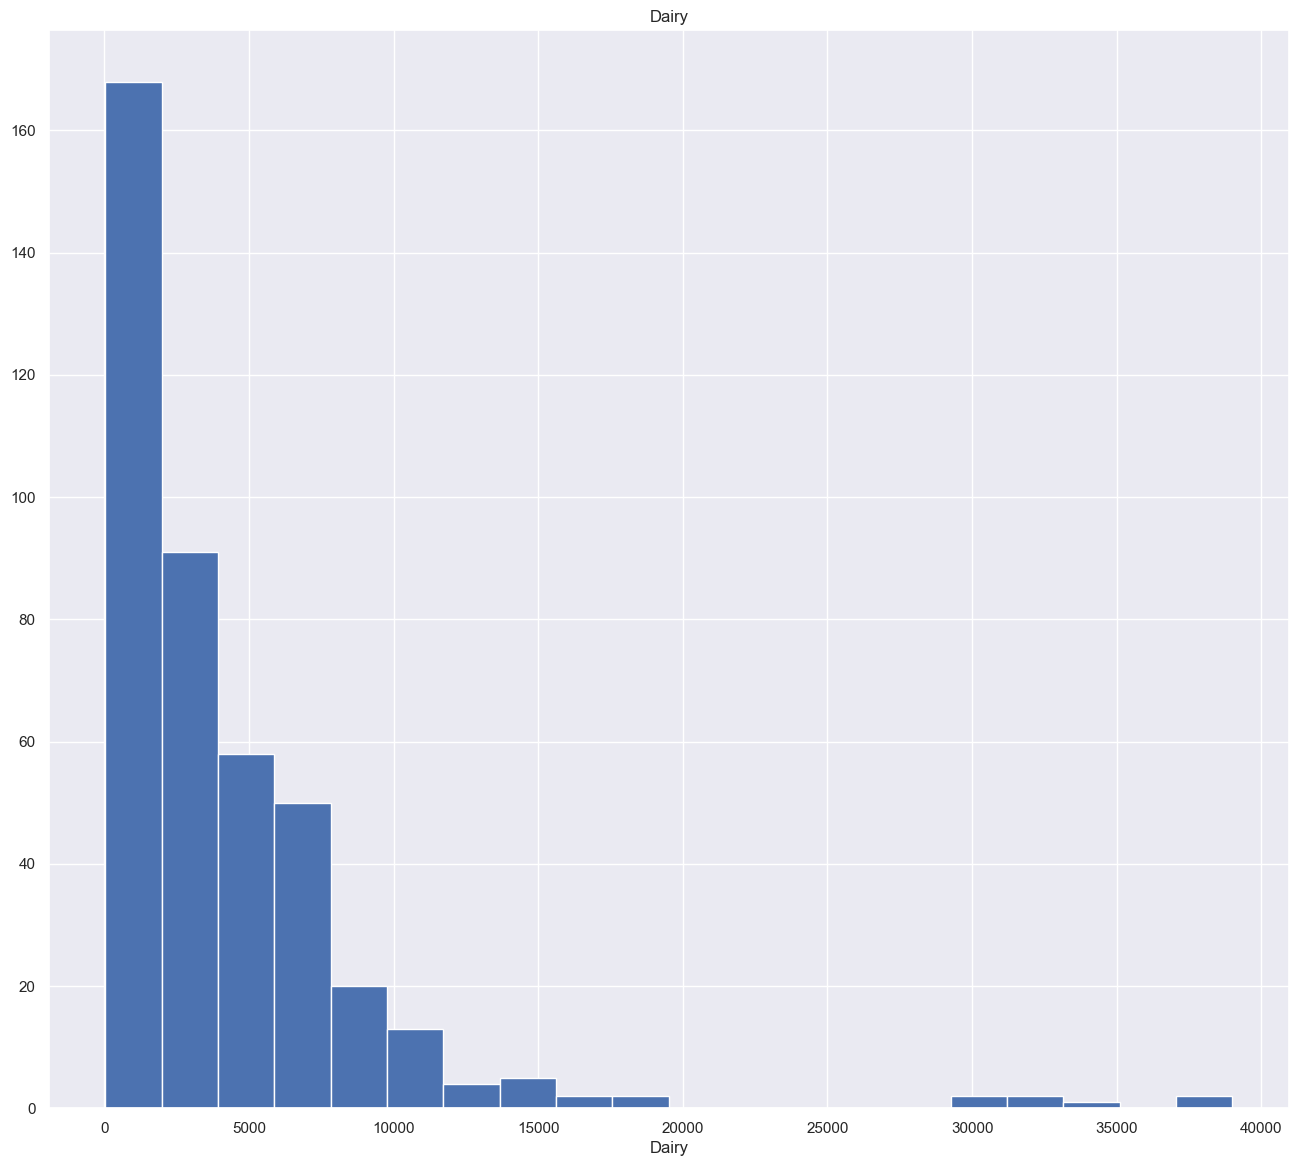

count       420.000
mean     427331.698
std      409837.441
min        5000.000
5%        35847.350
10%       55252.000
20%       94438.200
30%      117400.400
40%      229320.000
50%      325000.000
60%      405800.000
70%      635485.200
80%      710085.200
90%      907288.520
95%      957345.200
99%     1642627.200
max     3454500.000
Name: Biogas Generation Estimate (cu-ft/day), dtype: float64


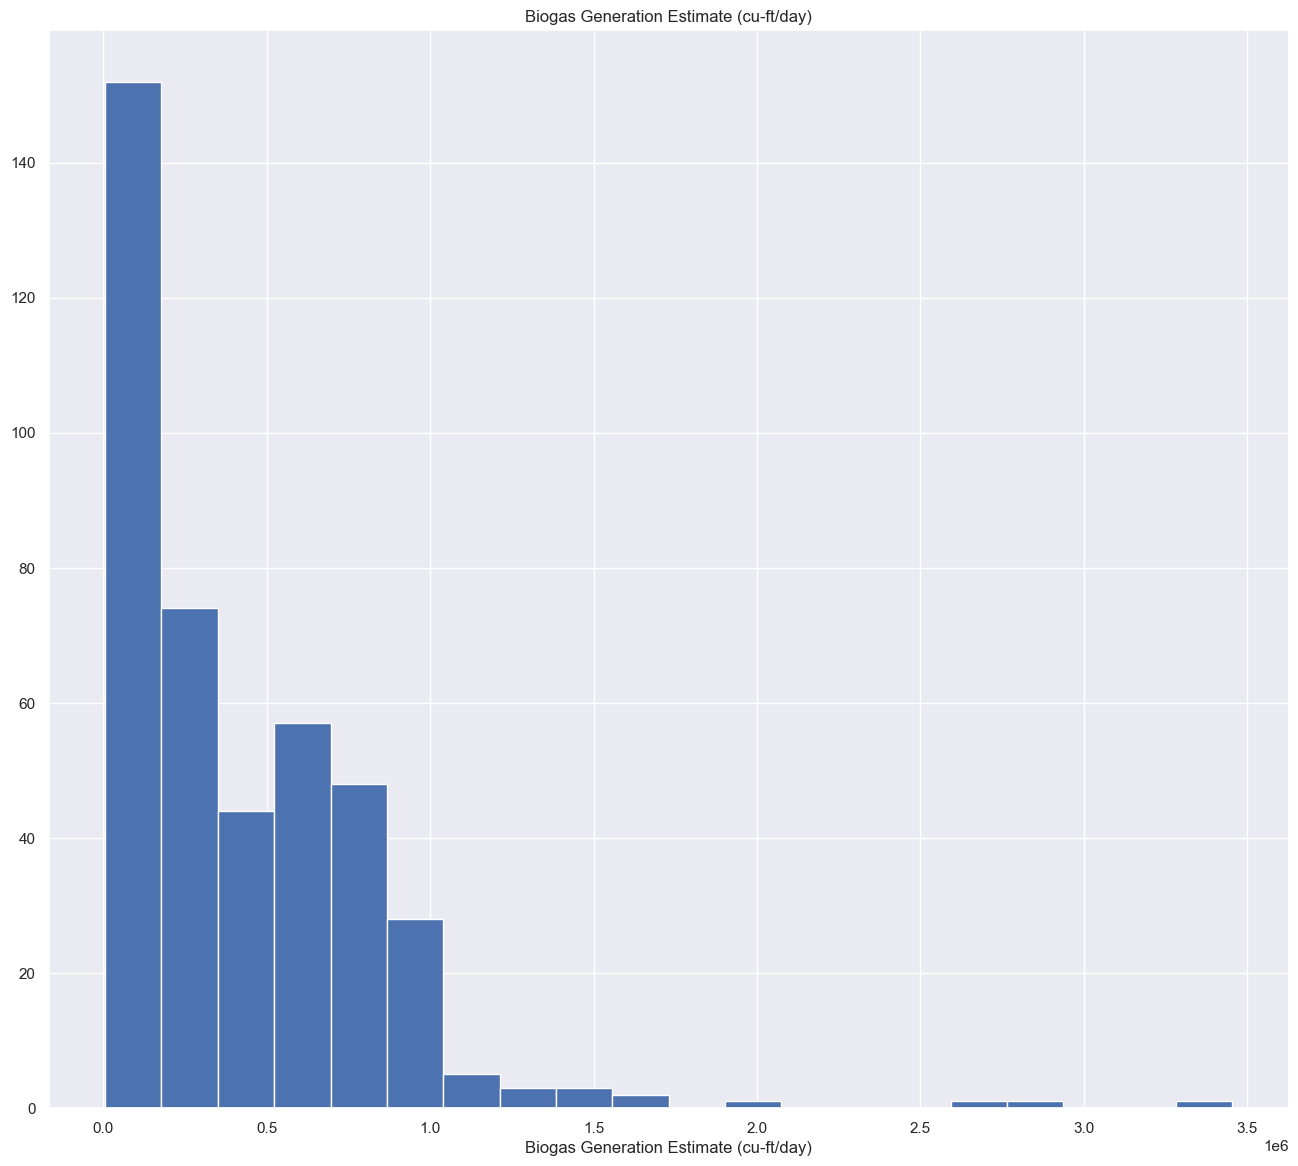

count        420.000
mean     2058721.635
std      3057433.458
min            0.000
5%             0.000
10%            0.000
20%            0.000
30%            0.000
40%       410391.600
50%       759790.200
60%      1278960.000
70%      2177684.200
80%      3587328.640
90%      6017580.000
95%      7837363.140
99%     15801083.800
max     18527400.000
Name: Electricity Generated (kWh/yr), dtype: float64


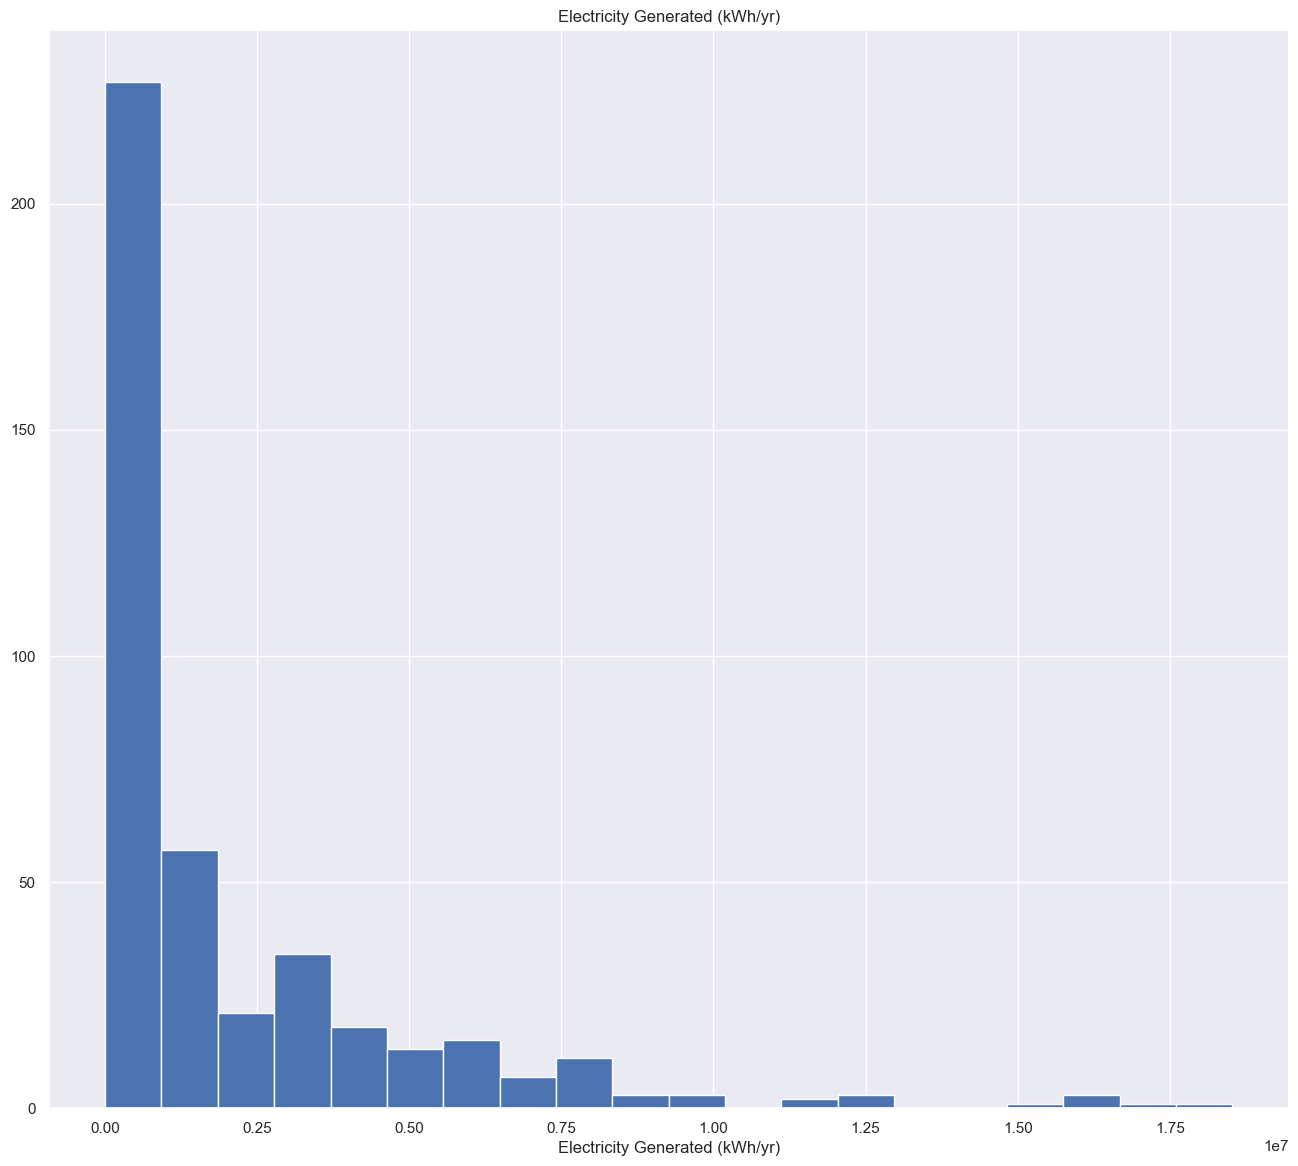

count      420.000
mean     39590.584
std      46316.663
min        157.295
5%        2670.820
10%       3409.134
20%       6603.131
30%      13156.949
40%      18659.300
50%      27008.310
60%      36127.795
70%      48268.969
80%      59098.405
90%      88099.409
95%     104588.223
99%     256049.011
max     390000.011
Name: Total Emission Reductions (MTCO2e/yr), dtype: float64


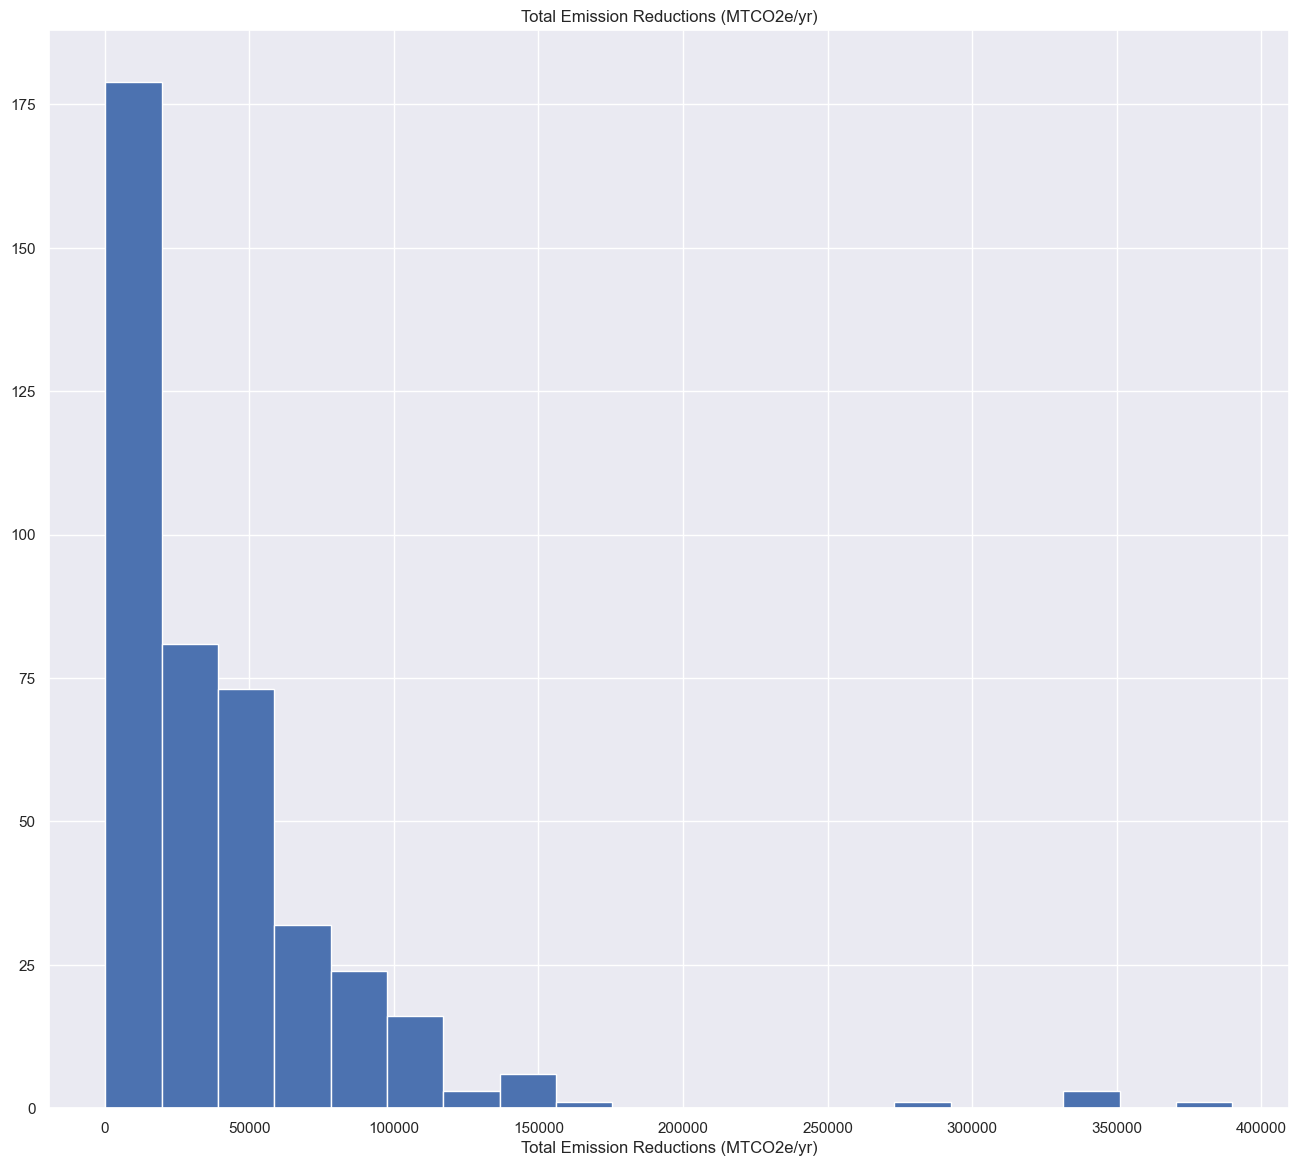

count   420.000
mean      9.581
std       8.097
min       0.000
5%        0.000
10%       0.000
20%       1.000
30%       2.000
40%       5.000
50%      10.000
60%      12.000
70%      14.000
80%      16.000
90%      19.000
95%      22.000
99%      37.810
max      44.000
Name: Operational Years, dtype: float64


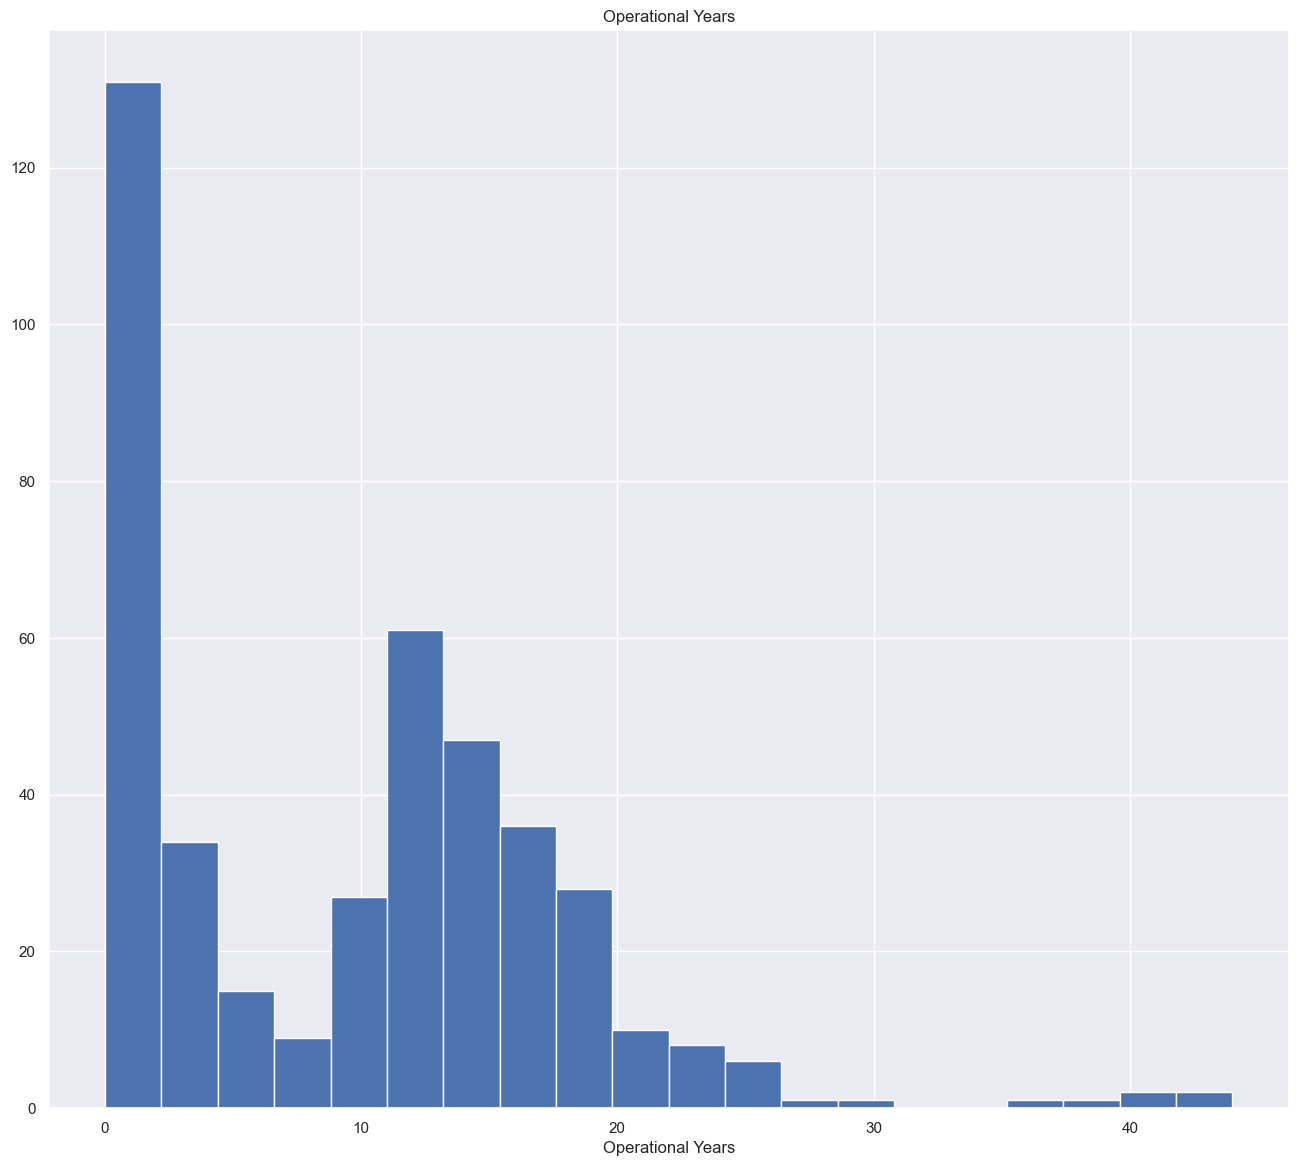

count     420.000
mean      368.799
std      1245.554
min         1.385
5%         18.033
10%        27.735
20%        50.000
30%        50.000
40%        55.963
50%        83.951
60%       110.772
70%       167.985
80%       339.603
90%       733.351
95%      1415.473
99%      4895.933
max     20287.671
Name: Biogas_per_Animal (cu-ft/day), dtype: float64


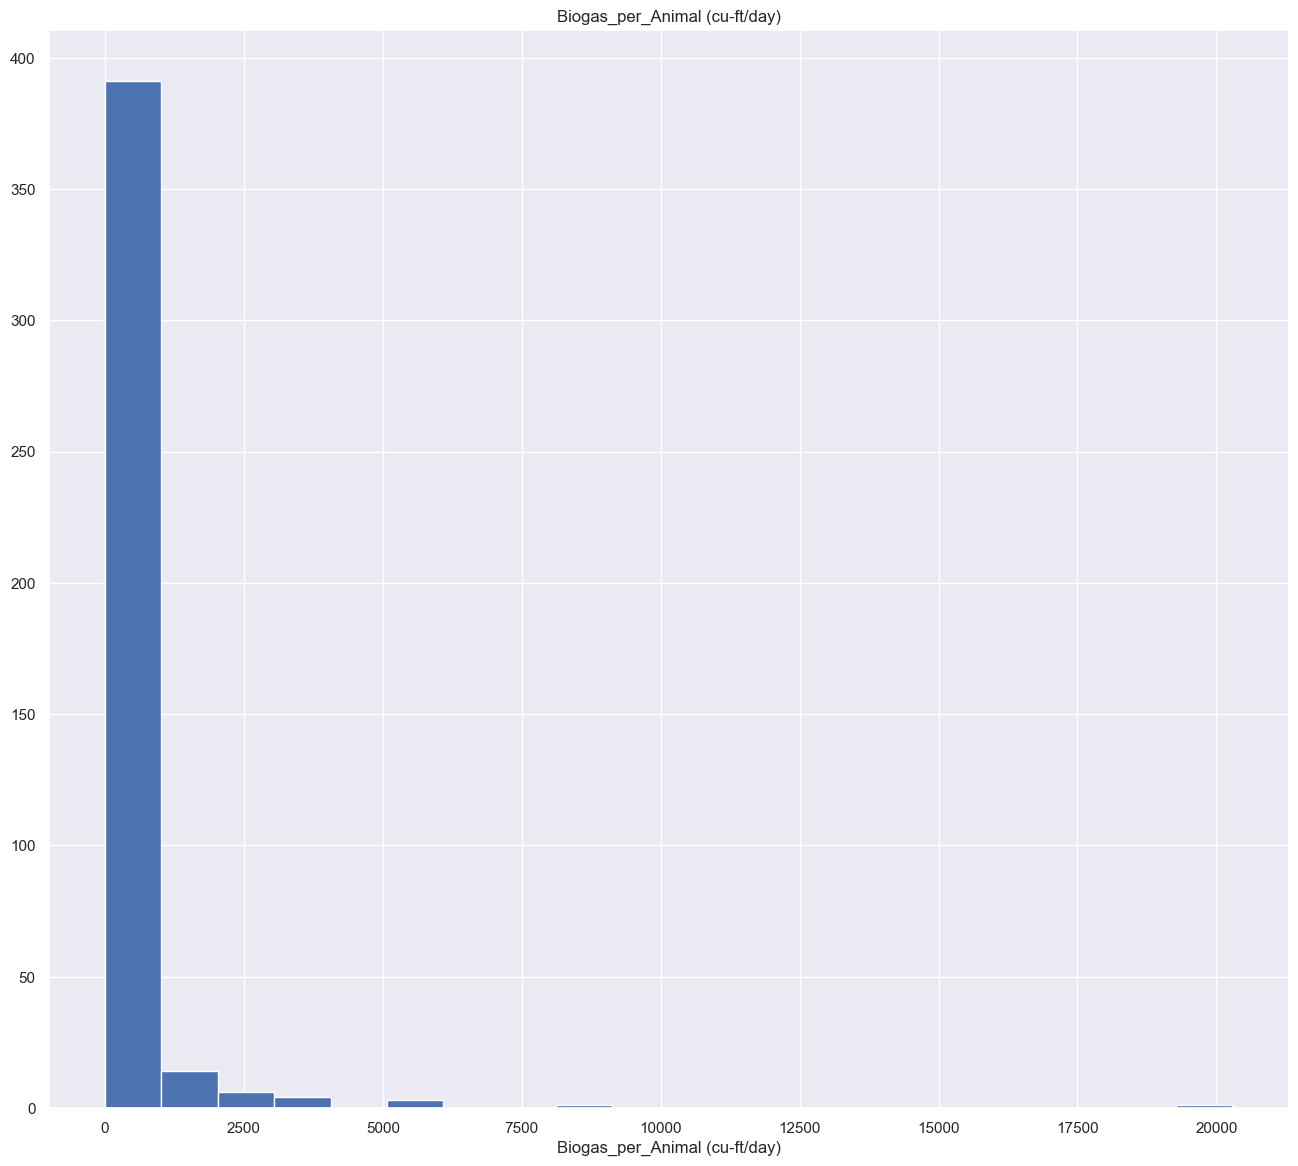

count      420.000
mean     10705.352
std      19007.005
min          0.000
5%           0.000
10%          0.000
20%        236.771
30%        565.288
40%       1009.418
50%       1870.679
60%       3250.345
70%       6714.158
80%      17310.648
90%      35566.164
95%      57795.016
99%      83383.908
max     130000.004
Name: Emission_Reduction_per_Year, dtype: float64


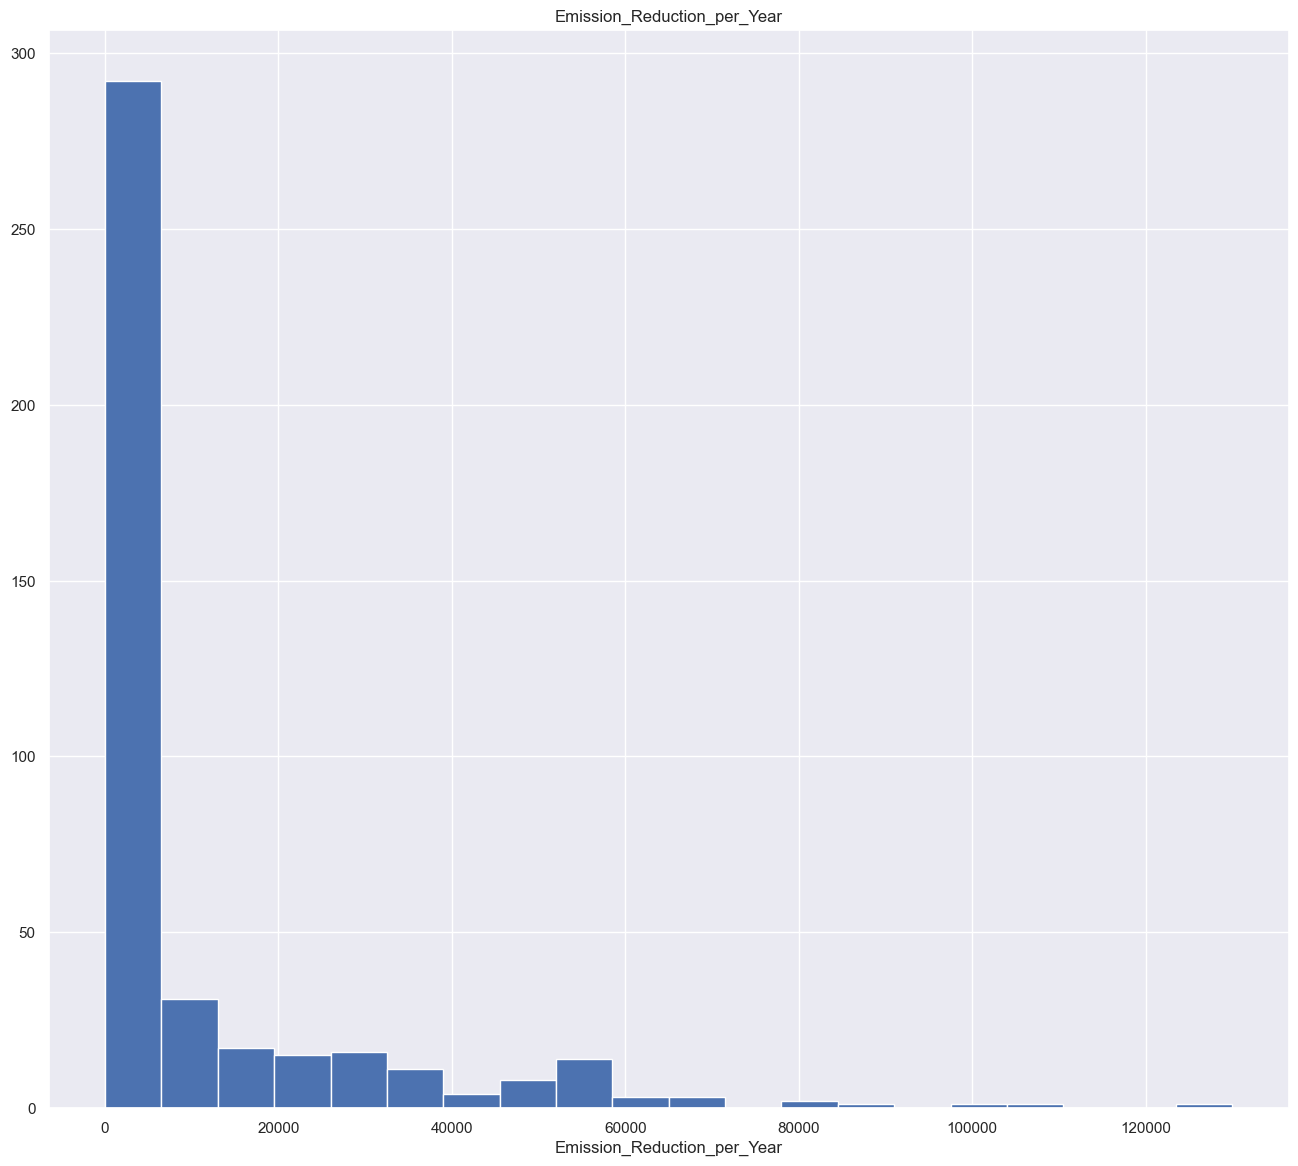

count   420.000
mean     10.387
std      19.801
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       1.463
50%       3.982
60%       6.907
70%      10.203
80%      14.868
90%      24.597
95%      43.904
99%      96.777
max     174.270
Name: Electricity_to_Biogas_Ratio, dtype: float64


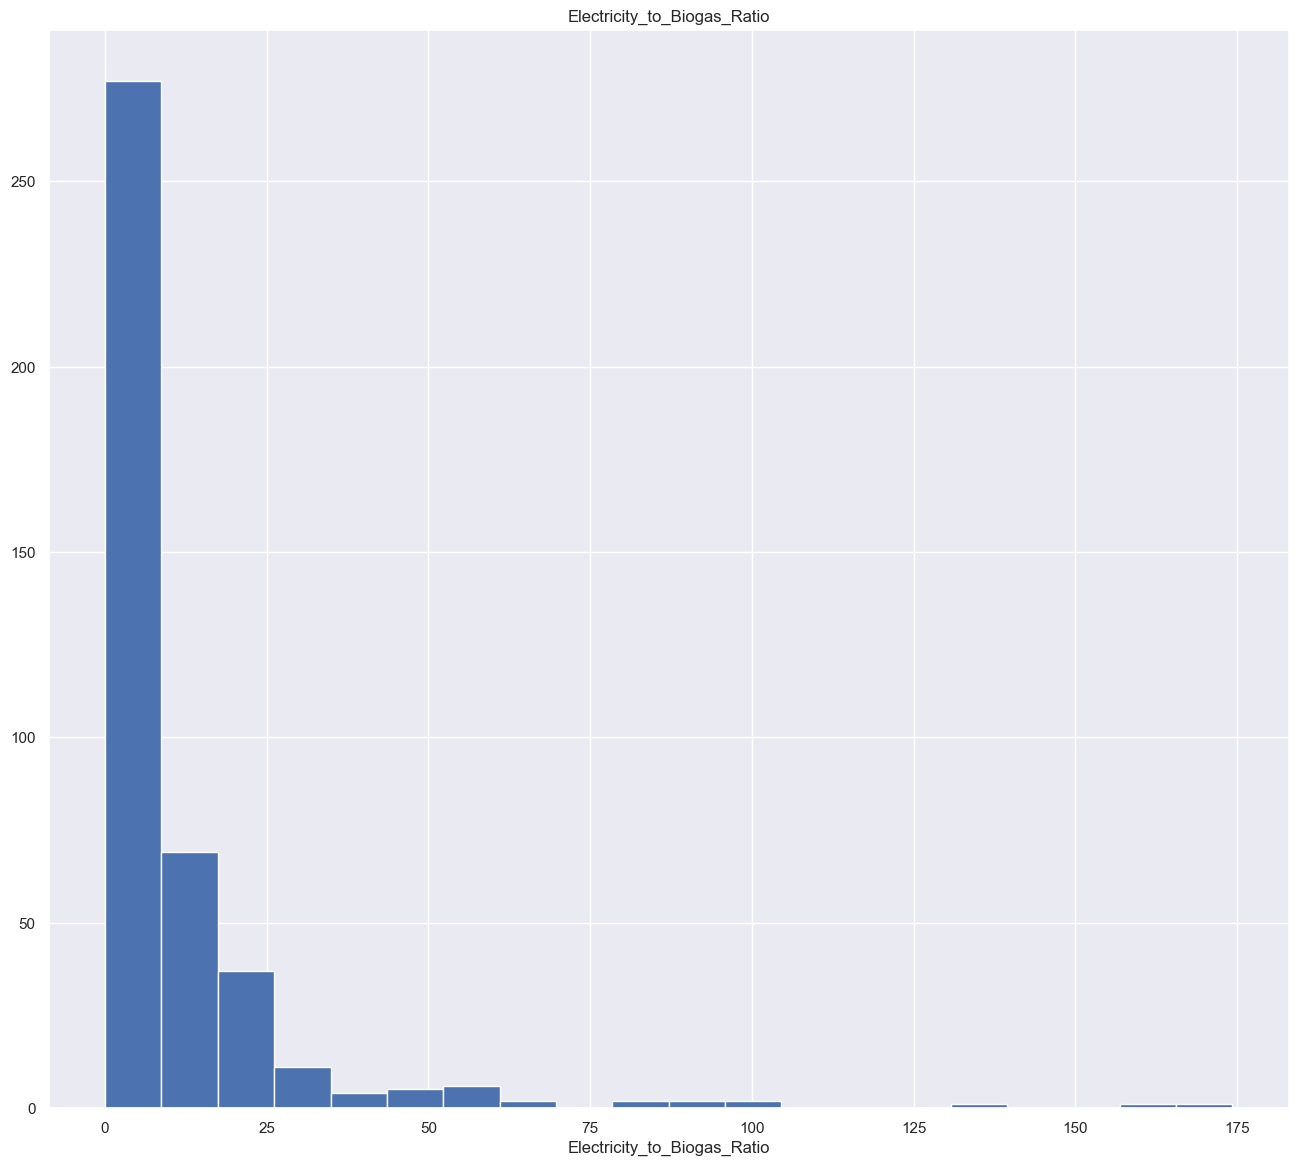

count       420.000
mean     143098.838
std      191633.460
min        1020.000
5%        11883.000
10%       17000.000
20%       28050.000
30%       41395.000
40%       68000.000
50%       85000.000
60%      122549.600
70%      170000.000
80%      221000.000
90%      302940.000
95%      364665.300
99%     1088850.000
max     2126000.000
Name: Total_Waste_kg/day, dtype: float64


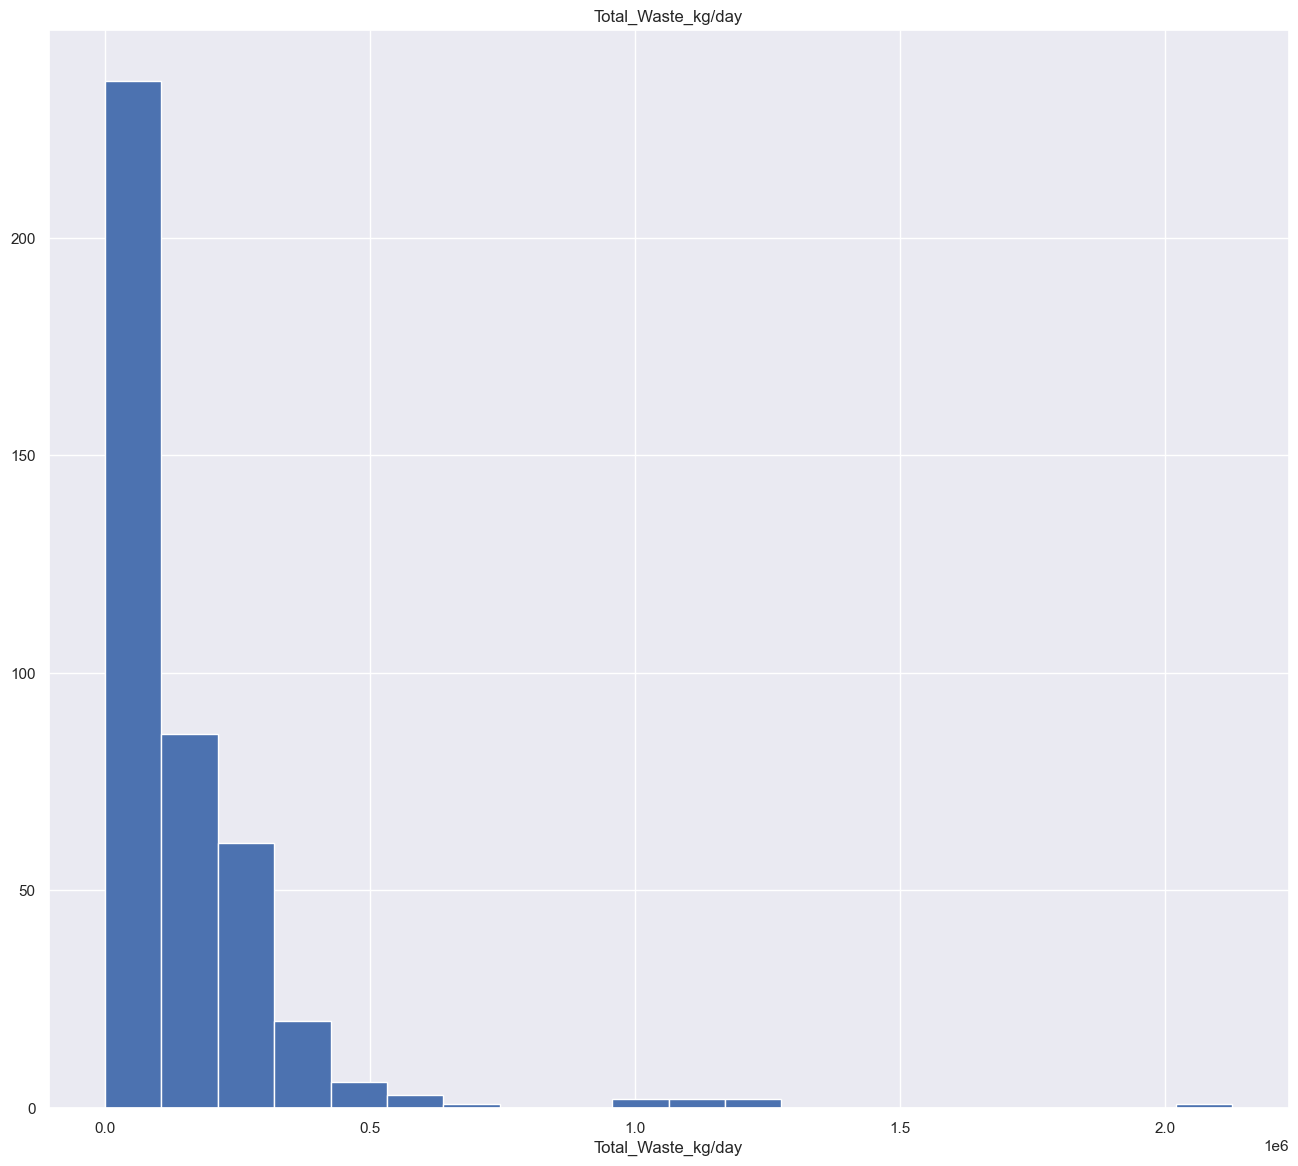

count   420.000
mean     10.893
std      36.660
min       0.043
5%        0.564
10%       0.829
20%       1.471
30%       1.471
40%       1.707
50%       2.477
60%       3.283
70%       5.001
80%       9.988
90%      21.569
95%      41.632
99%     144.795
max     596.696
Name: Waste_Efficiency, dtype: float64


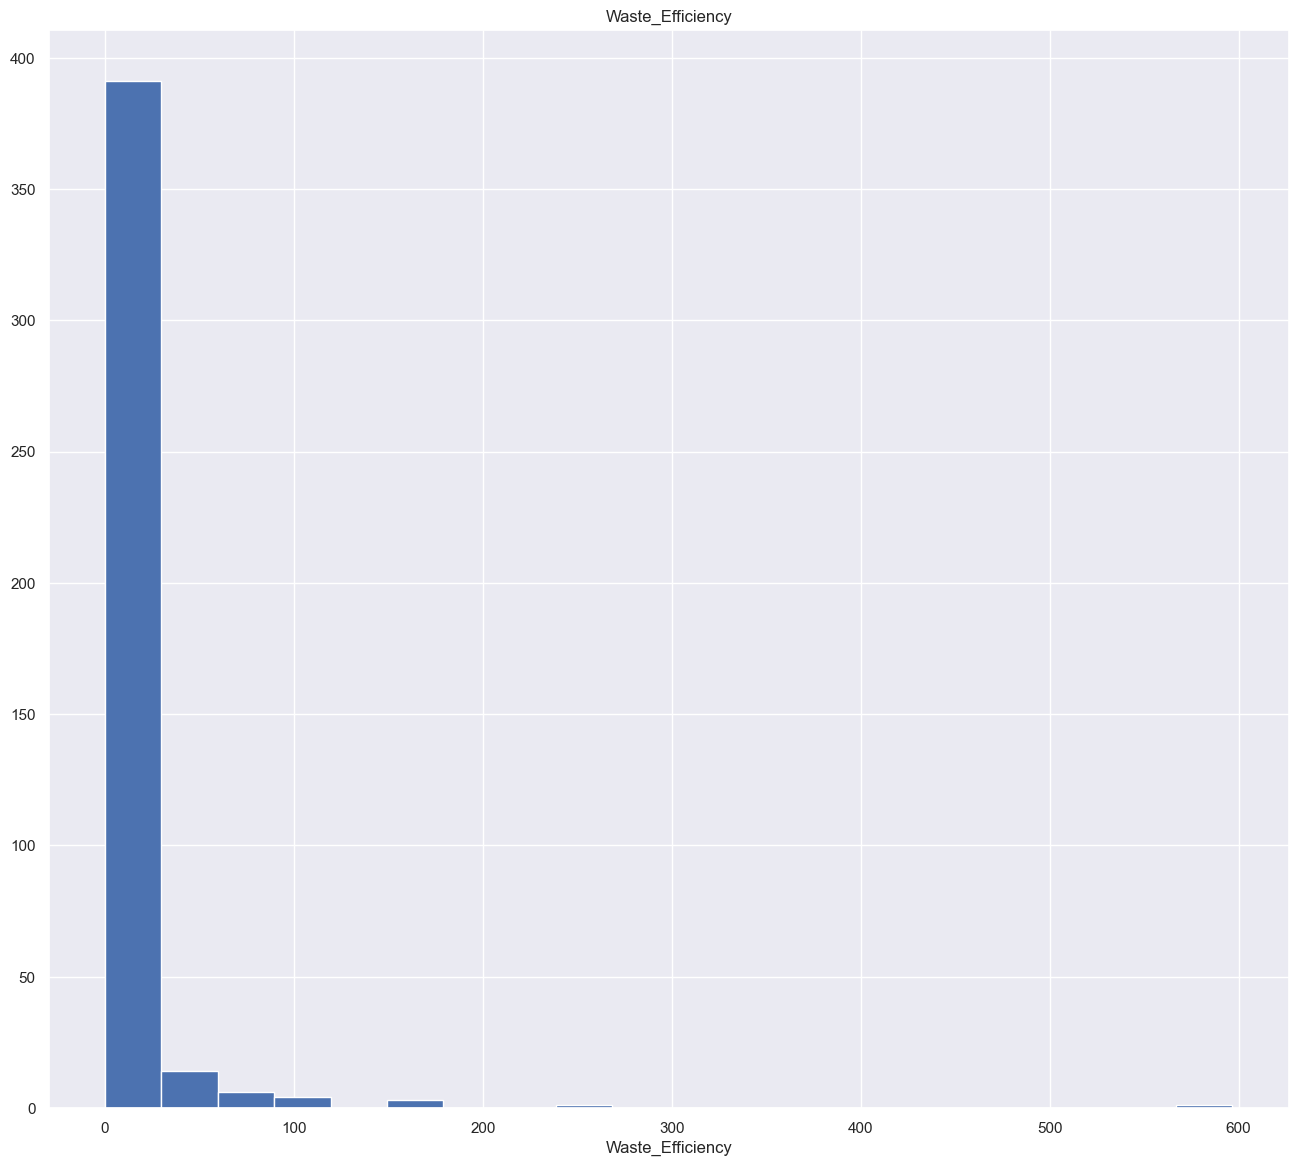

count    420.000
mean      36.862
std       80.111
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        6.510
50%       18.050
60%       25.962
70%       38.977
80%       52.282
90%       77.334
95%      121.555
99%      362.938
max     1150.824
Name: Electricity_Efficiency, dtype: float64


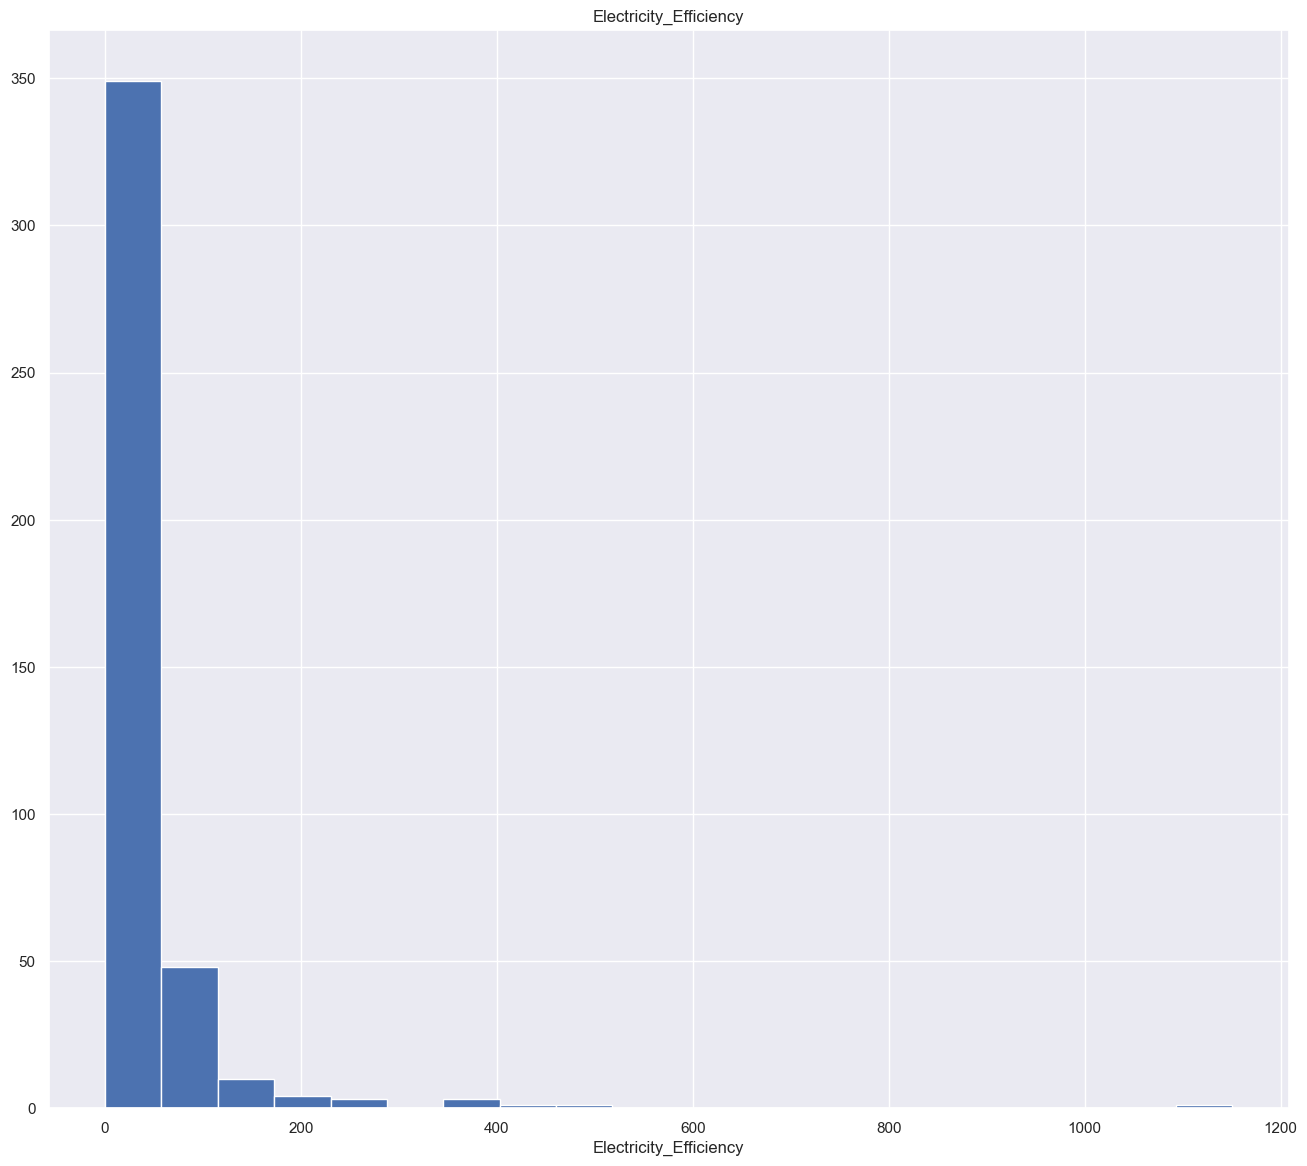

In [83]:
for col in num_cols:
    num_summary(df, col, plot = True)

In [84]:
# analysis of categorical variables by target
def target_summary_with_num(dataframe, target, numerical_col, plot = False):
    print(pd.DataFrame({numerical_col+'_mean': dataframe.groupby(target)[numerical_col].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=target, y=numerical_col, data=dataframe)
        plt.show(block=True)



In [85]:
for col in num_cols:
    target_summary_with_num(df, 'Biogas Generation Estimate (cu-ft/day)', col,  plot = False)

                                        Year Operational_mean
Biogas Generation Estimate (cu-ft/day)                       
5000.000                                             2008.000
12000.000                                            2007.000
13000.000                                            1994.000
14000.000                                            1997.500
14832.000                                            2004.000
...                                                       ...
1657485.200                                          2004.000
2000000.000                                          2019.000
2739726.000                                          2008.000
2908000.000                                          2006.000
3454500.000                                          2018.000

[273 rows x 1 columns]


                                        Dairy_mean
Biogas Generation Estimate (cu-ft/day)            
5000.000                                   140.000
12000.000      

In [86]:
# lets analyze correlation
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    corr = dataframe.corr(numeric_only=True)
    corr_matrix = corr.abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize':(16, 14)})
        sns.heatmap(corr, cmap="RdBu", annot=True, fmt=".2f")
        plt.show()
    return drop_list

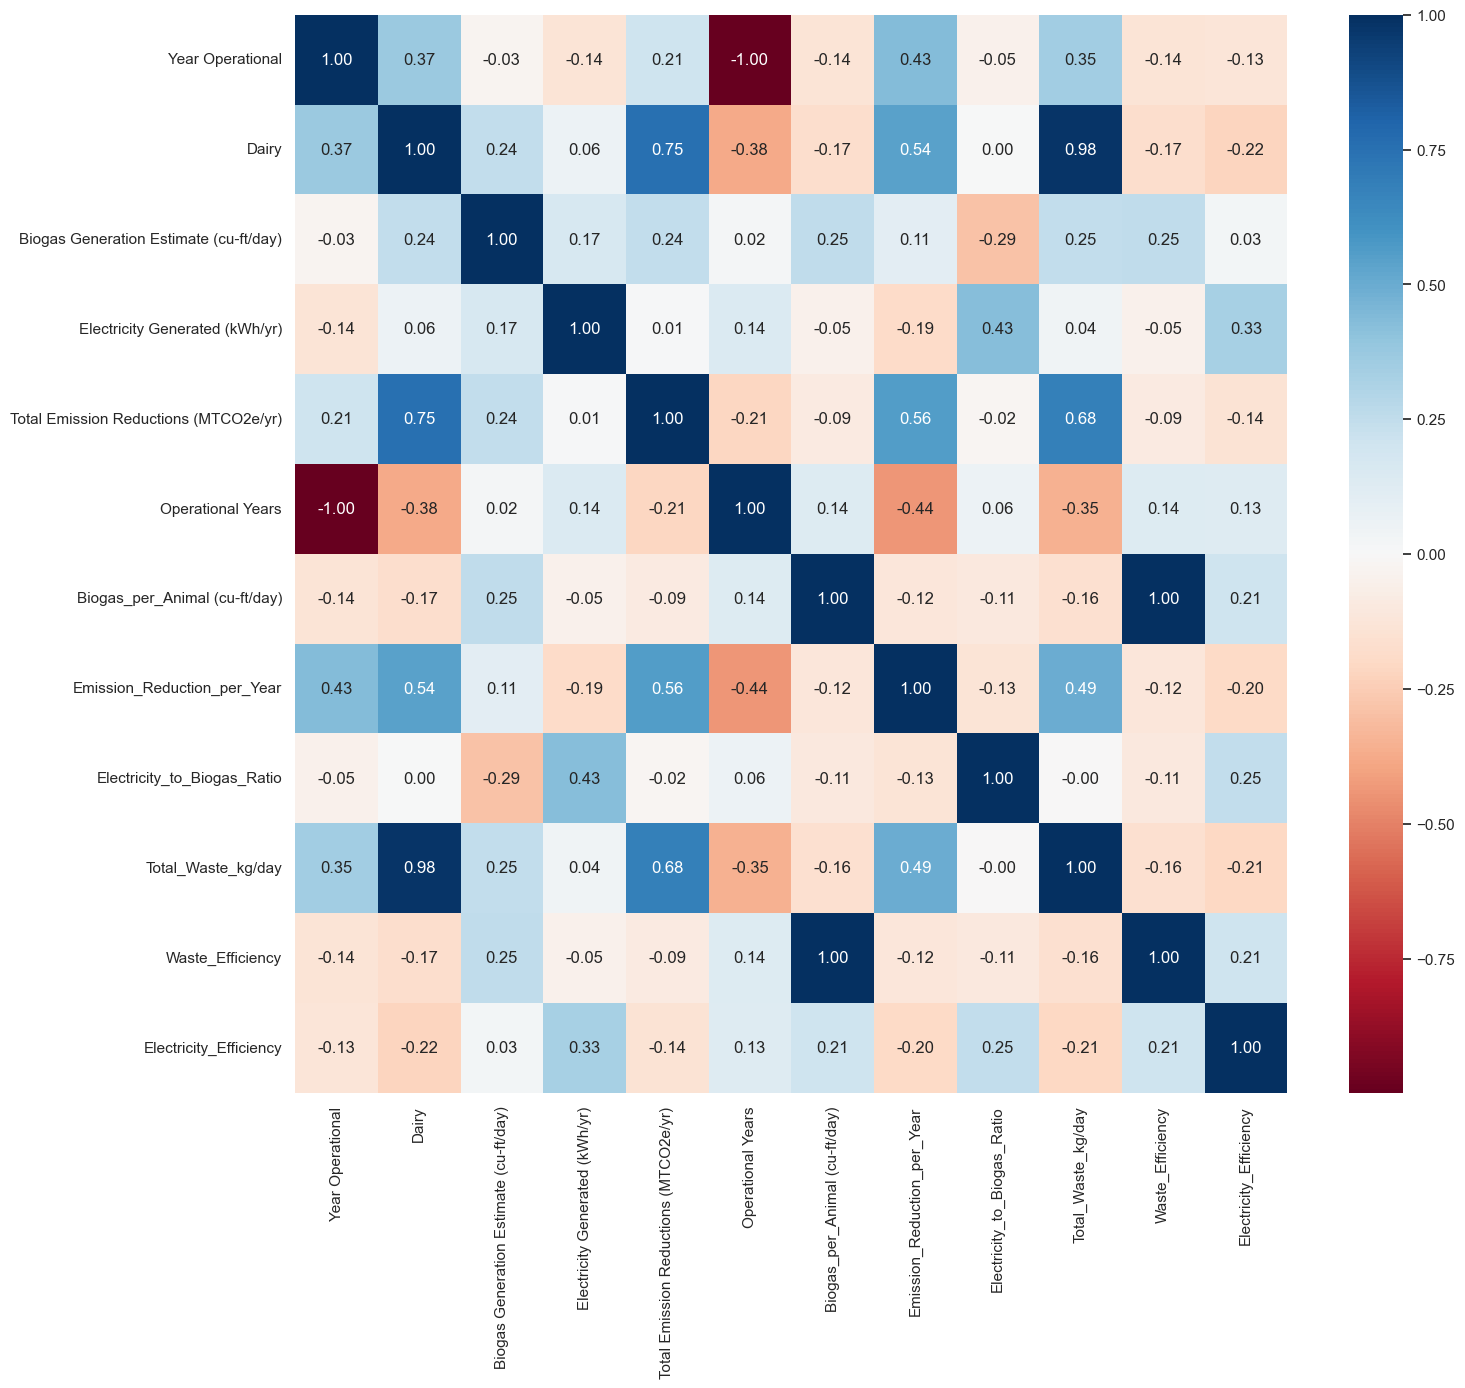

['Total Emission Reductions (MTCO2e/yr)',
 'Operational Years',
 'Total_Waste_kg/day',
 'Waste_Efficiency']

In [87]:
high_correlated_cols(df, plot=True)

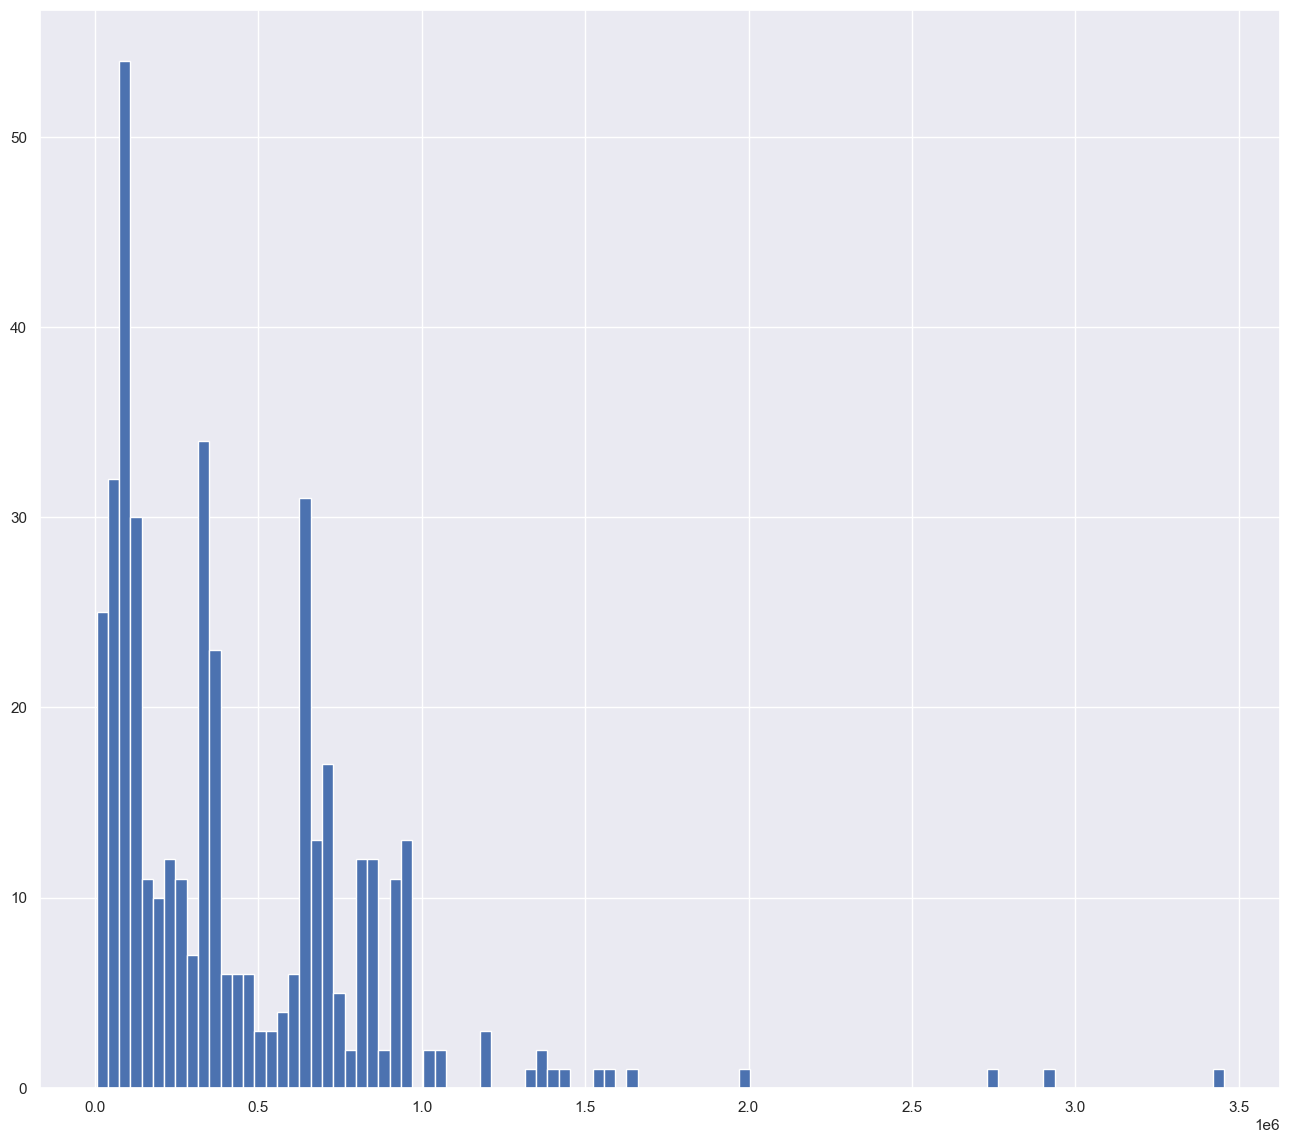

In [88]:
# plotting distribution of dependent variable
df["Biogas Generation Estimate (cu-ft/day)"].hist(bins=100)
plt.show(block=True)

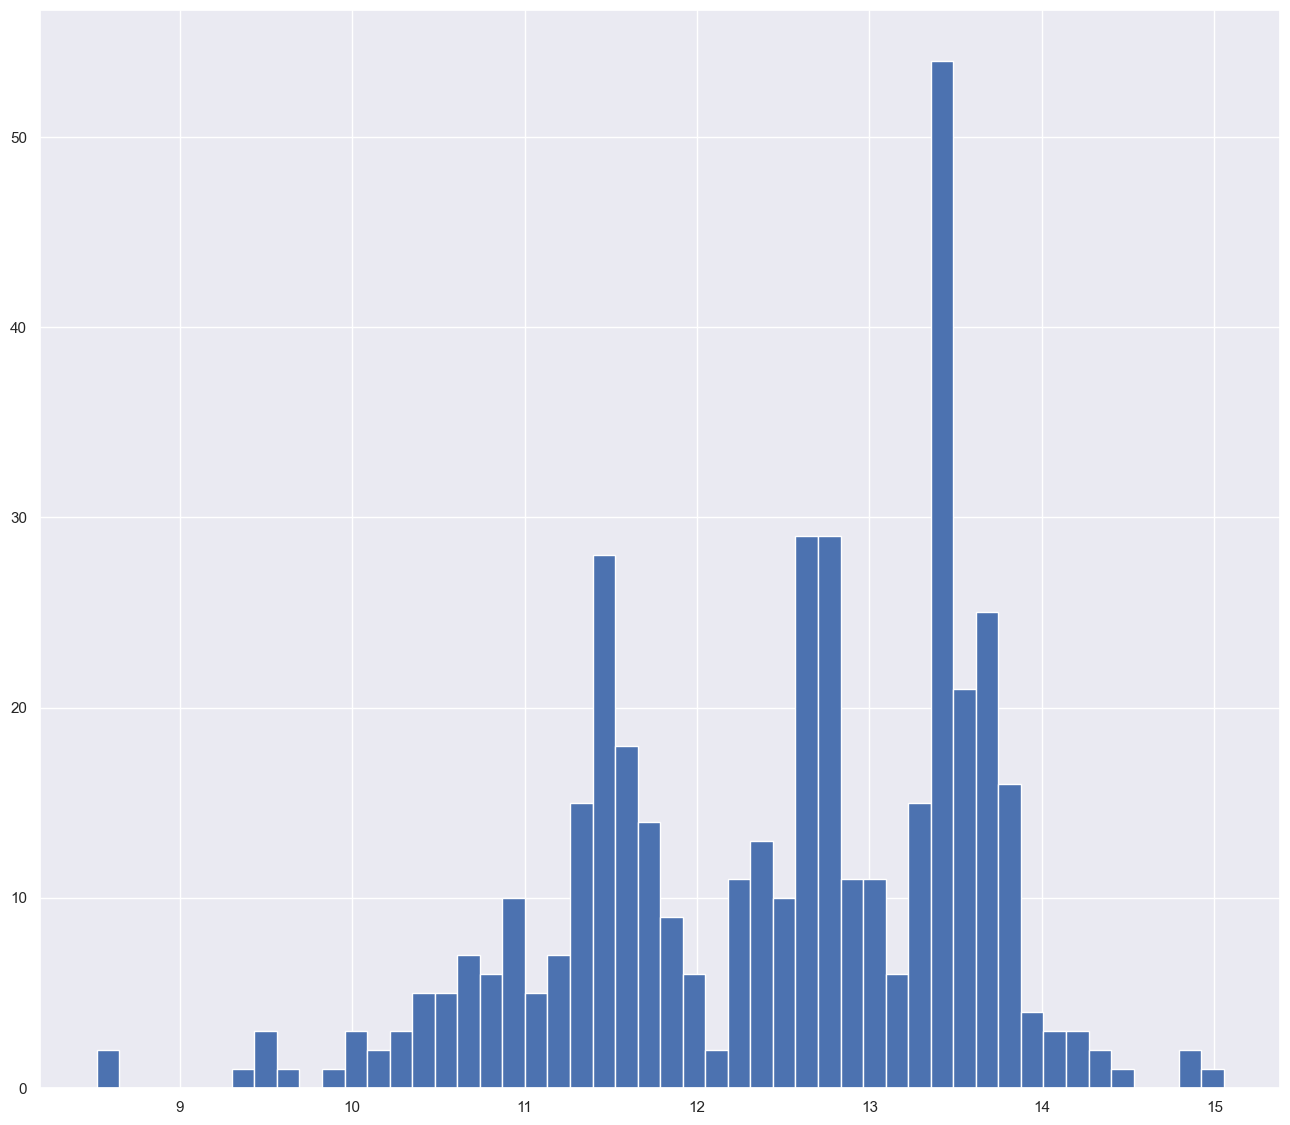

In [89]:
# Lets examine the log of the Dependent Variable
np.log1p(df['Biogas Generation Estimate (cu-ft/day)']).hist(bins=50)
plt.show(block=True)

In [90]:
# Outlier analysis
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [91]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [92]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


In [93]:
for col in num_cols:
    print(col, check_outlier(df, col))

Year Operational True
Dairy True
Biogas Generation Estimate (cu-ft/day) True
Electricity Generated (kWh/yr) True
Total Emission Reductions (MTCO2e/yr) True
Operational Years True
Biogas_per_Animal (cu-ft/day) True
Emission_Reduction_per_Year True
Electricity_to_Biogas_Ratio True
Total_Waste_kg/day True
Waste_Efficiency True
Electricity_Efficiency True


In [94]:
# replace outlier with threshold value
for col in num_cols:
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

In [95]:
for col in num_cols:
    print(col, check_outlier(df, col))

Year Operational False
Dairy False
Biogas Generation Estimate (cu-ft/day) False
Electricity Generated (kWh/yr) False
Total Emission Reductions (MTCO2e/yr) False
Operational Years False
Biogas_per_Animal (cu-ft/day) False
Emission_Reduction_per_Year False
Electricity_to_Biogas_Ratio False
Total_Waste_kg/day False
Waste_Efficiency False
Electricity_Efficiency False


In [96]:
# Analyzing missing values
df.head()

,Project Type,Digester Type,Status,Year Operational,Animal/Farm Type(s),Dairy,Co-Digestion,Biogas Generation Estimate (cu-ft/day),Electricity Generated (kWh/yr),Biogas End Use(s),LCFS Pathway?,Receiving Utility,Total Emission Reductions (MTCO2e/yr),Awarded USDA Funding?,Operational Years,Biogas_per_Animal (cu-ft/day),Emission_Reduction_per_Year,Electricity_to_Biogas_Ratio,Total_Waste_kg/day,Waste_Efficiency,Electricity_Efficiency
1,Farm Scale,Mixed Plug Flow,Operational,2022.000,Dairy,11760.000,No-Info,109486.000,389698.200,Pipeline Gas,No-Info,Yes,14030.129,Yes,1.000,9.310,14030.129,3.559,399840.000,0.274,0.975
2,Farm Scale,Unknown or Unspecified,Construction,2022.000,Dairy,8800.000,No-Info,94500.000,2813080.400,Pipeline Gas,No-Info,No-Info,98999.890,No-Info,1.000,10.739,25870.008,29.768,299200.000,0.316,9.402
3,Centralized/Regional,Complete Mix,Operational,2018.000,Dairy,12683.625,No-Info,1500477.750,2760336.000,Pipeline Gas,No-Info,Yes,131276.014,No-Info,5.000,115.150,25870.008,0.799,430950.000,3.387,2.706
4,Farm Scale,Complete Mix,Operational,2021.000,Dairy,10000.000,No-Info,852545.200,0.000,CNG,No-Info,Yes,100569.493,No-Info,2.000,85.255,25870.008,0.000,340000.000,2.507,0.000
5,Farm Scale,Covered Lagoon,Operational,2011.000,Dairy,12683.625,No-Info,663685.200,5256000.000,Electricity,Yes,Yes,131276.014,No-Info,12.000,44.246,12915.962,7.919,430950.000,1.301,10.306


In [97]:
df.shape

(420, 21)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420 entries, 1 to 489
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Project Type                            420 non-null    object 
 1   Digester Type                           420 non-null    object 
 2   Status                                  420 non-null    object 
 3   Year Operational                        420 non-null    float64
 4   Animal/Farm Type(s)                     420 non-null    object 
 5   Dairy                                   420 non-null    float64
 6   Co-Digestion                            420 non-null    object 
 7   Biogas Generation Estimate (cu-ft/day)  420 non-null    float64
 8   Electricity Generated (kWh/yr)          420 non-null    float64
 9   Biogas End Use(s)                       420 non-null    object 
 10  LCFS Pathway?                           420 non-null    object 
 11

In [99]:
df.shape


(420, 21)

In [100]:
df["Dairy"] = df["Dairy"].apply(lambda x: x if pd.notna(x) and np.isreal(x) else '0')

In [101]:
df.isnull().sum()


Project Type                              0
Digester Type                             0
Status                                    0
Year Operational                          0
Animal/Farm Type(s)                       0
Dairy                                     0
Co-Digestion                              0
Biogas Generation Estimate (cu-ft/day)    0
Electricity Generated (kWh/yr)            0
Biogas End Use(s)                         0
LCFS Pathway?                             0
Receiving Utility                         0
Total Emission Reductions (MTCO2e/yr)     0
Awarded USDA Funding?                     0
Operational Years                         0
Biogas_per_Animal (cu-ft/day)             0
Emission_Reduction_per_Year               0
Electricity_to_Biogas_Ratio               0
Total_Waste_kg/day                        0
Waste_Efficiency                          0
Electricity_Efficiency                    0
dtype: int64

In [102]:
# Rare analysis
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ':', len(dataframe[col].value_counts()))
        print(pd.DataFrame({'COUNT': dataframe[col].value_counts(),
                            'RATIO': dataframe[col].value_counts() / len(dataframe),
                            'TARGET_MEAN': dataframe.groupby(col)[target].mean()}), end='\n\n\n')

In [103]:
rare_analyser(df, 'Biogas Generation Estimate (cu-ft/day)', cat_cols)

Project Type : 4
                        COUNT  RATIO  TARGET_MEAN
Project Type                                     
Centralized/Regional       14  0.033   609626.693
Farm Scale                385  0.917   411053.856
Multiple Farm/Facility     15  0.036   442864.027
Research                    6  0.014   109876.667


Digester Type : 13
                                    COUNT  RATIO  TARGET_MEAN
Digester Type                                                
Anaerobic Sequencing Batch Reactor      3  0.007   673445.200
Complete Mix                          102  0.243   426693.791
Complete Mix Mini Digester              1  0.002   635485.200
Covered Lagoon                        146  0.348   408282.917
Fixed Film/Attached Media               6  0.014   482901.733
Horizontal Plug Flow                   32  0.076   251834.931
Induced Blanket Reactor                 5  0.012   361476.670
Mixed Plug Flow                       109  0.260   470758.271
Modular Plug Flow                       2 

In [104]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()
    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O' and (temp_df[col].value_counts()/ len(temp_df) < rare_perc).any(axis=None)]
    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])
        return temp_df

In [105]:
rare_encoder(df, 0.01)


,Project Type,Digester Type,Status,Year Operational,Animal/Farm Type(s),Dairy,Co-Digestion,Biogas Generation Estimate (cu-ft/day),Electricity Generated (kWh/yr),Biogas End Use(s),LCFS Pathway?,Receiving Utility,Total Emission Reductions (MTCO2e/yr),Awarded USDA Funding?,Operational Years,Biogas_per_Animal (cu-ft/day),Emission_Reduction_per_Year,Electricity_to_Biogas_Ratio,Total_Waste_kg/day,Waste_Efficiency,Electricity_Efficiency
1,Farm Scale,Mixed Plug Flow,Operational,2022.000,Dairy,11760.000,No-Info,109486.000,389698.200,Pipeline Gas,No-Info,Yes,14030.129,Yes,1.000,9.310,14030.129,3.559,399840.000,0.274,0.975
2,Farm Scale,Unknown or Unspecified,Construction,2022.000,Dairy,8800.000,No-Info,94500.000,2813080.400,Pipeline Gas,No-Info,No-Info,98999.890,No-Info,1.000,10.739,25870.008,29.768,299200.000,0.316,9.402
3,Centralized/Regional,Complete Mix,Operational,2018.000,Dairy,12683.625,No-Info,1500477.750,2760336.000,Pipeline Gas,No-Info,Yes,131276.014,No-Info,5.000,115.150,25870.008,0.799,430950.000,3.387,2.706
4,Farm Scale,Complete Mix,Operational,2021.000,Dairy,10000.000,No-Info,852545.200,0.000,CNG,No-Info,Yes,100569.493,No-Info,2.000,85.255,25870.008,0.000,340000.000,2.507,0.000
5,Farm Scale,Covered Lagoon,Operational,2011.000,Dairy,12683.625,No-Info,663685.200,5256000.000,Electricity,Yes,Yes,131276.014,No-Info,12.000,44.246,12915.962,7.919,430950.000,1.301,10.306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,Farm Scale,Complete Mix,Shut down,2006.000,Dairy,1240.000,Yes,1500477.750,6450000.000,Electricity,No-Info,Yes,103258.573,Yes,17.000,540.743,6074.034,2.218,42160.000,16.064,115.742
486,Farm Scale,Mixed Plug Flow,Shut down,2005.000,Dairy,1200.000,No-Info,356020.000,3350700.000,Cogeneration,No-Info,Yes,45346.437,Yes,18.000,296.683,2519.246,9.412,40800.000,8.726,82.125
487,Farm Scale,Horizontal Plug Flow,Shut down,2002.000,Dairy,1000.000,No-Info,310865.600,946080.000,Electricity,No-Info,Yes,50391.122,No-Info,21.000,310.866,2399.577,3.043,34000.000,9.143,27.826
488,Farm Scale,Fixed Film/Attached Media,Shut down,1999.000,Dairy,1800.000,No-Info,200000.000,5584500.000,Electricity; Boiler/Furnace fuel,No-Info,No-Info,46163.455,No-Info,24.000,111.111,1923.477,27.922,61200.000,3.268,91.250


In [106]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

Observations: 420
Variables: 21
cat_cols: 9
num_cols: 12
cat_but_car: 0
num_but_cat: 0


In [107]:
# Encoding
def one_hot_encoder(dataframe, categorical_cols, drop_first = False):
    dataframe = pd.get_dummies(dataframe, columns = categorical_cols, drop_first = drop_first)
    return dataframe


In [108]:
df = one_hot_encoder(df, cat_cols, drop_first = True) # drop_first = True avoids multicollinearity

In [109]:
df.head()

,Year Operational,Dairy,Biogas Generation Estimate (cu-ft/day),Electricity Generated (kWh/yr),Total Emission Reductions (MTCO2e/yr),Operational Years,Biogas_per_Animal (cu-ft/day),Emission_Reduction_per_Year,Electricity_to_Biogas_Ratio,Total_Waste_kg/day,Waste_Efficiency,Electricity_Efficiency,Project Type_Farm Scale,Project Type_Multiple Farm/Facility,Project Type_Research,Digester Type_Complete Mix,Digester Type_Complete Mix Mini Digester,Digester Type_Covered Lagoon,Digester Type_Fixed Film/Attached Media,Digester Type_Horizontal Plug Flow,Digester Type_Induced Blanket Reactor,Digester Type_Mixed Plug Flow,Digester Type_Modular Plug Flow,Digester Type_No-Info,Digester Type_Plug Flow - Unspecified,Digester Type_Unknown or Unspecified,Digester Type_Vertical Plug Flow,Status_Operational,Status_Shut down,Animal/Farm Type(s)_Dairy,Animal/Farm Type(s)_Dairy; Poultry; Swine,Animal/Farm Type(s)_Dairy; Swine,Co-Digestion_Yes,Biogas End Use(s)_Boiler/Furnace fuel; CNG,Biogas End Use(s)_CNG,Biogas End Use(s)_Cogeneration,Biogas End Use(s)_Cogeneration; Boiler/Furnace fuel,Biogas End Use(s)_Cogeneration; CNG,Biogas End Use(s)_Cogeneration; Pipeline Gas,Biogas End Use(s)_Cogeneration; Refrigeration,Biogas End Use(s)_Electricity,Biogas End Use(s)_Electricity; Boiler/Furnace fuel,Biogas End Use(s)_Electricity; CNG,Biogas End Use(s)_Electricity; Cogeneration,Biogas End Use(s)_Electricity; Cogeneration; Boiler/Furnace fuel,Biogas End Use(s)_Electricity; Pipeline Gas,Biogas End Use(s)_Flared Full-time,Biogas End Use(s)_No-Info,Biogas End Use(s)_Pipeline Gas,Biogas End Use(s)_Pipeline to Electricity,LCFS Pathway?_Yes,Receiving Utility_Yes,Awarded USDA Funding?_Yes
1,2022.000,11760.000,109486.000,389698.200,14030.129,1.000,9.310,14030.129,3.559,399840.000,0.274,0.975,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
2,2022.000,8800.000,94500.000,2813080.400,98999.890,1.000,10.739,25870.008,29.768,299200.000,0.316,9.402,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,2018.000,12683.625,1500477.750,2760336.000,131276.014,5.000,115.150,25870.008,0.799,430950.000,3.387,2.706,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
4,2021.000,10000.000,852545.200,0.000,100569.493,2.000,85.255,25870.008,0.000,340000.000,2.507,0.000,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
5,2011.000,12683.625,663685.200,5256000.000,131276.014,12.000,44.246,12915.962,7.919,430950.000,1.301,10.306,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False


In [110]:
# Standardisation process
num_cols = [col for col in num_cols if col not in ['Biogas Generation Estimate (cu-ft/day)']]

In [111]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [112]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [113]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('[^A-Za-z0-9_]+', '', regex = True)
df.columns = df.columns.str.lower()

In [114]:
df.head()

,year_operational,dairy,biogas_generation_estimate_cuftday,electricity_generated_kwhyr,total_emission_reductions_mtco2eyr,operational_years,biogas_per_animal_cuftday,emission_reduction_per_year,electricity_to_biogas_ratio,total_waste_kgday,waste_efficiency,electricity_efficiency,project_type_farm_scale,project_type_multiple_farmfacility,project_type_research,digester_type_complete_mix,digester_type_complete_mix_mini_digester,digester_type_covered_lagoon,digester_type_fixed_filmattached_media,digester_type_horizontal_plug_flow,digester_type_induced_blanket_reactor,digester_type_mixed_plug_flow,digester_type_modular_plug_flow,digester_type_noinfo,digester_type_plug_flow__unspecified,digester_type_unknown_or_unspecified,digester_type_vertical_plug_flow,status_operational,status_shut_down,animalfarm_types_dairy,animalfarm_types_dairy_poultry_swine,animalfarm_types_dairy_swine,codigestion_yes,biogas_end_uses_boilerfurnace_fuel_cng,biogas_end_uses_cng,biogas_end_uses_cogeneration,biogas_end_uses_cogeneration_boilerfurnace_fuel,biogas_end_uses_cogeneration_cng,biogas_end_uses_cogeneration_pipeline_gas,biogas_end_uses_cogeneration_refrigeration,biogas_end_uses_electricity,biogas_end_uses_electricity_boilerfurnace_fuel,biogas_end_uses_electricity_cng,biogas_end_uses_electricity_cogeneration,biogas_end_uses_electricity_cogeneration_boilerfurnace_fuel,biogas_end_uses_electricity_pipeline_gas,biogas_end_uses_flared_fulltime,biogas_end_uses_noinfo,biogas_end_uses_pipeline_gas,biogas_end_uses_pipeline_to_electricity,lcfs_pathway_yes,receiving_utility_yes,awarded_usda_funding_yes
1,0.692,1.989,109486.000,-0.120,-0.265,-0.692,-0.380,1.194,-0.034,1.991,-0.377,-0.369,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
2,0.692,1.353,94500.000,0.668,1.470,-0.692,-0.373,2.357,2.077,1.355,-0.370,-0.187,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,0.385,2.187,1500477.750,0.651,2.128,-0.385,0.159,2.357,-0.256,2.188,0.156,-0.331,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
4,0.615,1.611,852545.200,-0.247,1.502,-0.615,0.007,2.357,-0.321,1.613,0.005,-0.390,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
5,-0.154,2.187,663685.200,1.462,2.128,0.154,-0.202,1.085,0.317,2.188,-0.201,-0.167,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False


In [115]:
# Lets create the model
y = df['biogas_generation_estimate_cuftday']
X = df.drop(["biogas_generation_estimate_cuftday"], axis = 1)

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [117]:
# Create a model List
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))]


In [118]:
# Lets initialize empty lists for storing metrics
rmse_scores = []
r2_scores = []
mae_scores = []
mse_scores = []
execution_times = []
model_names = []
import time
from sklearn.model_selection import cross_val_score
from sklearn import metrics

for name, regressor in models:
    start_time = time.time()

    # fit the model
    regressor.fit(X_train, y_train)
    # predict
    y_pred = regressor.predict(X_test)
    # calculate RMSE

    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_squared_error')))
    rmse_scores.append(rmse)


    # Calculate R^2 score
    r2 = metrics.r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Calculate MAE
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

    # MSE
    mse = metrics.mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    # Calculate execution time of the model
    execution_time = time.time() - start_time
    execution_times.append(execution_time)

    #Store model
    model_names.append(name)

results_df = pd.DataFrame({
    'Model': model_names,
    'RMSE': rmse_scores,
    'R^2 Score': r2_scores,
    'MAE': mae_scores,
    'MSE': mse_scores,
    'Execution Time': execution_times

})

results_df



C:\Users\user\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.612e+12, tolerance: 4.175e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.651e+12, tolerance: 4.175e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.053e+12, toleranc

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 336, number of used features: 26
[LightGBM] [Info] Start training from score 426966.380697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

,Model,RMSE,R^2 Score,MAE,MSE,Execution Time
0,LR,778207.575,0.509,167470.248,53227766449.301,0.216
1,Ridge,221185.018,0.599,158146.490,43547484184.963,0.276
2,Lasso,234859.698,0.511,167352.311,53042507929.817,0.112
3,ElasticNet,229581.966,0.535,172896.575,50412906807.285,0.044
4,KNN,244710.609,0.385,158449.857,66786277320.311,0.045
5,CART,196779.773,0.748,82618.493,27301996835.428,0.084
6,RF,150520.617,0.792,74437.319,22584540868.882,3.234
7,GBM,148970.862,0.815,80825.329,20030258796.356,1.361
8,XGBoost,168456.361,0.769,72956.759,25082798563.007,1.915
9,LightGBM,148441.343,0.823,77077.325,19184316497.937,0.516


In [119]:
# Hyperparameter optimisation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [120]:
# lists to store metrics.
rmse_scores = []
r2_scores = []
mae_scores = []
mse_scores = []
execution_times = []
model_names = []


In [121]:
# defining the hyper Parameters.

param_grids = {
    'LR': {},
    'Ridge': {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]},
    'Lasso': {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]},
    'ElasticNet': {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
    'KNN': {'n_neighbors': [1, 3, 5, 7, 9]},
    'CART': {'max_depth': [None, 5, 10, 20, 30], 'min_samples_leaf': [1, 2, 3]},
    'RF': {'n_estimators': [10, 30, 50, 70, 100], 'max_depth': [None, 5, 10, 20]},
    'GBM': {'n_estimators': [10, 30, 50, 70, 100], 'learning_rate': [0.005, 0.01, 0.05, 0.1]},
    'XGBoost': {'n_estimators': [10, 30, 50, 70, 100], 'learning_rate': [0.005, 0.01, 0.05, 0.1]},
    'LightGBM': {'n_estimators': [10, 30, 50, 70, 100], 'learning_rate': [0.005, 0.01, 0.05, 0.1]},
    'CatBoost': {'iterations': [10, 30, 50, 70, 100], 'learning_rate': [0.005, 0.01, 0.05, 0.1], 'depth': [3, 4, 5, 6, 7]}
}

In [122]:
best_global_score = np.inf
best_global_model = None

for name, regressor in models:
    start_time = time.time()

    # Hyperparameter tuning with GridSearchCV if param_grids is defined
    if param_grids.get(name):
        grid_search = GridSearchCV(regressor, param_grid=param_grids[name], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = regressor
        best_model.fit(X_train, y_train)

        y_pred = best_model.predict(X_test)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

    # Update best global model and score
    if rmse < best_global_score:
        best_global_score = rmse
        best_global_model = best_model

    # Calculate other metrics
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    # Calculate execution time
    execution_time = time.time() - start_time
    execution_times.append(execution_time)

    # Store model name
    model_names.append(name)

# df to store the results
results_with_tuning_df = pd.DataFrame({
    'Model': model_names,
    'RMSE': rmse_scores,
    'R^2 Score': r2_scores,
    'MAE': mae_scores,
    'MSE': mse_scores,
    'Execution Time (s)': execution_times
})

results_with_tuning_df

C:\Users\user\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.765e+11, tolerance: 4.175e+09
  model = cd_fast.enet_coordinate_descent(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 336, number of used features: 26
[LightGBM] [Info] Start training from score 426966.380697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

,Model,RMSE,R^2 Score,MAE,MSE,Execution Time (s)
0,LR,230711.435,0.509,167470.248,53227766449.301,0.019
1,Ridge,230711.435,0.509,167470.248,53227766449.301,15.278
2,Lasso,230711.435,0.509,167470.248,53227766449.301,0.464
3,ElasticNet,230711.435,0.509,167470.248,53227766449.301,1.115
4,KNN,230711.435,0.509,167470.248,53227766449.301,0.530
5,CART,230711.435,0.509,167470.248,53227766449.301,0.617
6,RF,230711.435,0.509,167470.248,53227766449.301,16.677
7,GBM,230711.435,0.509,167470.248,53227766449.301,5.780
8,XGBoost,230711.435,0.509,167470.248,53227766449.301,10.074
9,LightGBM,230711.435,0.509,167470.248,53227766449.301,11.887


In [124]:
# Final model prediction
print(best_global_model)
print(best_global_score)


LinearRegression()
230711.43545412138


In [125]:
final_model = best_global_model
y_final_pred = final_model.predict(X_test)
final_y_pred = (y_final_pred)
final_y_test =(y_test)


results = pd.DataFrame({'Predicted Price': final_y_pred, 'True Price': final_y_test})

results['Difference'] = results['True Price'] - results['Predicted Price']

print("First 5 rows:")
print(results.head())

print("\nLast 5 rows:")
print(results.tail())

First 5 rows:
     Predicted Price  True Price  Difference
152       -96418.046  120327.000  216745.046
384      -904279.356   59428.600  963707.956
187       249616.701  366282.200  116665.499
421       501299.936  300000.000 -201299.936
486       603514.038  356020.000 -247494.038

Last 5 rows:
     Predicted Price  True Price  Difference
477       747120.642  318000.000 -429120.642
58        497439.516  415000.000  -82439.516
480       891212.697  603600.000 -287612.697
25        552199.536  953945.200  401745.664
18        459122.281  533000.000   73877.719
